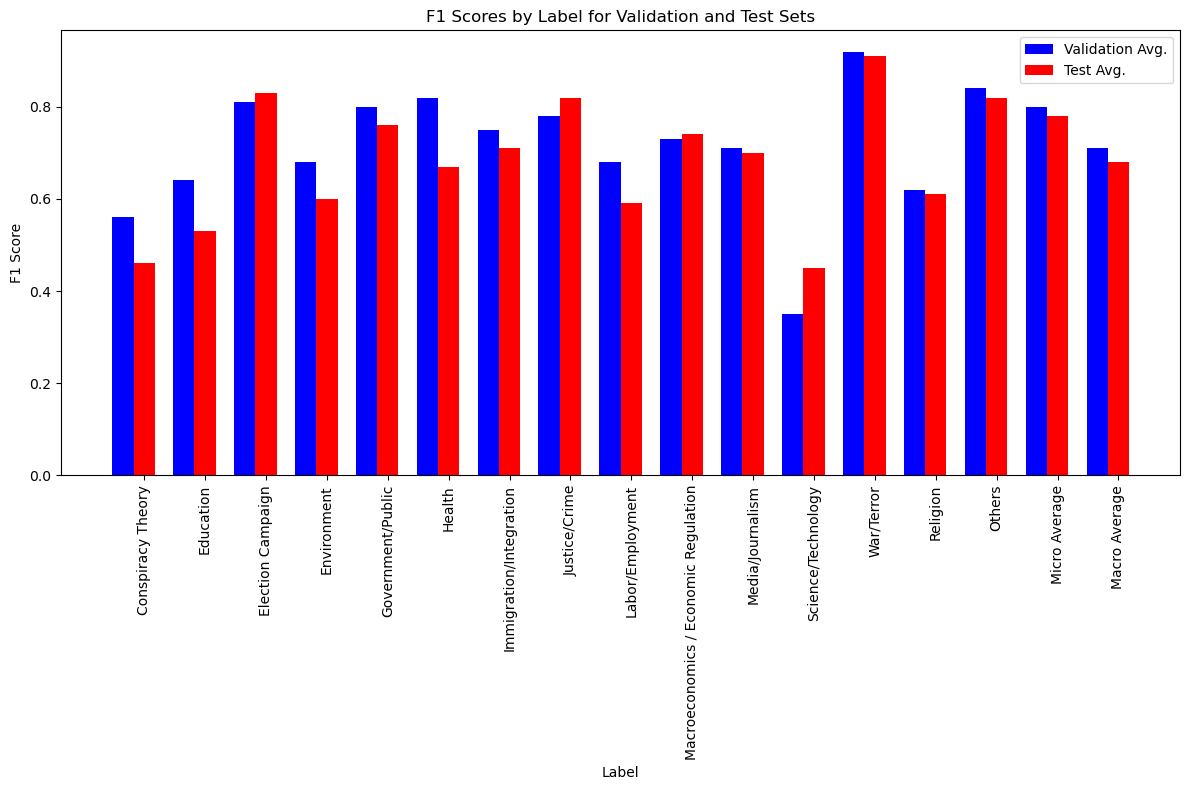

In [4]:
import matplotlib.pyplot as plt

# Data extracted from the table
labels = [
    "Conspiracy Theory", "Education", "Election Campaign", "Environment", 
    "Government/Public", "Health", "Immigration/Integration", "Justice/Crime", 
    "Labor/Employment", "Macroeconomics / Economic Regulation", "Media/Journalism", 
    "Science/Technology", "War/Terror", "Religion", "Others", "Micro Average", "Macro Average"
]

validation_avg = [
    0.56, 0.64, 0.81, 0.68, 0.80, 0.82, 0.75, 0.78, 0.68, 0.73, 0.71, 0.35, 0.92, 0.62, 0.84, 0.80, 0.71
]

test_avg = [
    0.46, 0.53, 0.83, 0.60, 0.76, 0.67, 0.71, 0.82, 0.59, 0.74, 0.70, 0.45, 0.91, 0.61, 0.82, 0.78, 0.68
]

# Plotting
bar_width = 0.35
index = range(len(labels))

fig, ax = plt.subplots(figsize=(12, 8))
bar1 = ax.bar(index, validation_avg, bar_width, label='Validation Avg.', color='b')
bar2 = ax.bar([i + bar_width for i in index], test_avg, bar_width, label='Test Avg.', color='r')

# Labeling, title and axes ticks
ax.set_xlabel('Label')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores by Label for Validation and Test Sets')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(labels, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


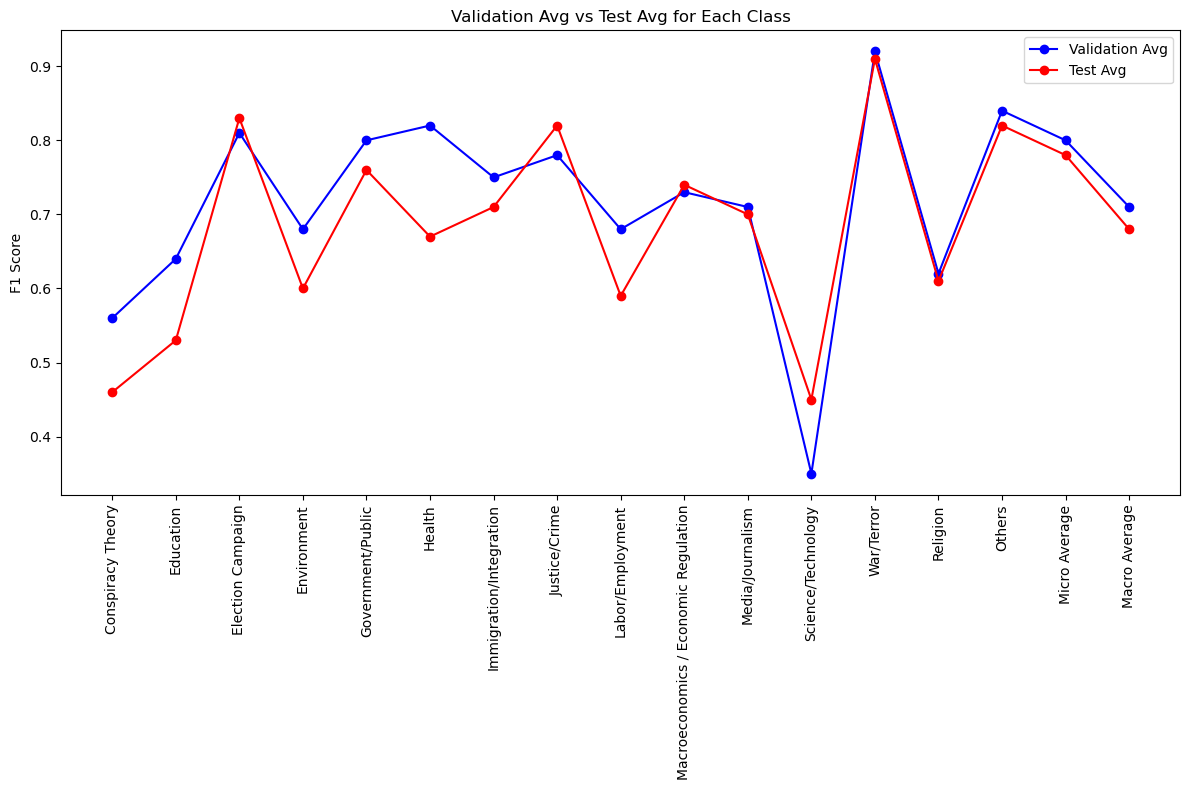

In [5]:
import matplotlib.pyplot as plt

# Data extracted from the table
labels = [
    "Conspiracy Theory", "Education", "Election Campaign", "Environment", 
    "Government/Public", "Health", "Immigration/Integration", "Justice/Crime", 
    "Labor/Employment", "Macroeconomics / Economic Regulation", "Media/Journalism", 
    "Science/Technology", "War/Terror", "Religion", "Others", "Micro Average", "Macro Average"
]

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(labels, validation_avg, marker='o', label='Validation Avg', color='blue')
plt.plot(labels, test_avg, marker='o', label='Test Avg', color='red')
plt.title('Validation Avg vs Test Avg for Each Class')
plt.ylabel('F1 Score')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


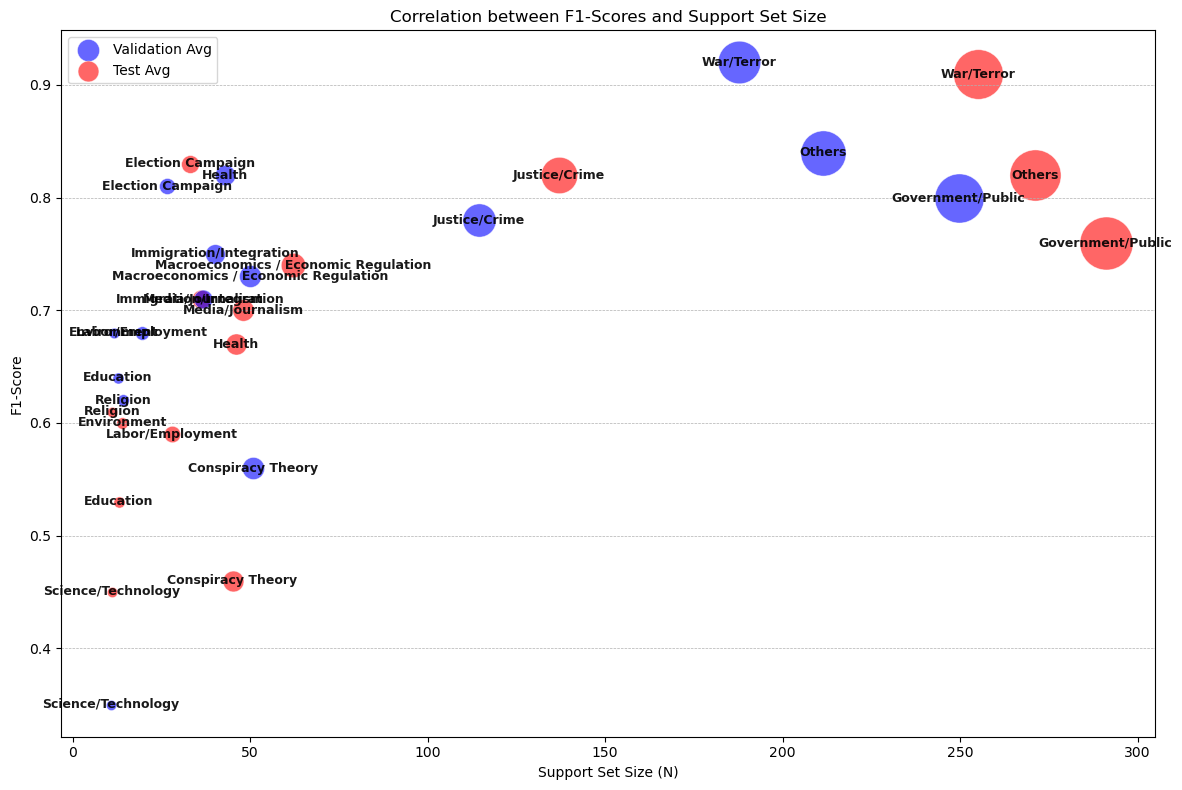

In [13]:
import matplotlib.pyplot as plt

# Data extracted from the table
labels = [
    "Conspiracy Theory", "Education", "Election Campaign", "Environment", 
    "Government/Public", "Health", "Immigration/Integration", "Justice/Crime", 
    "Labor/Employment", "Macroeconomics / Economic Regulation", "Media/Journalism", 
    "Science/Technology", "War/Terror", "Religion", "Others"]#, "Micro Average", "Macro Average"
#]

validation_avg = [
    0.56, 0.64, 0.81, 0.68, 0.80, 0.82, 0.75, 0.78, 0.68, 0.73, 0.71, 0.35, 0.92, 0.62, 0.84#, 0.80, 0.71
]

test_avg = [
    0.46, 0.53, 0.83, 0.60, 0.76, 0.67, 0.71, 0.82, 0.59, 0.74, 0.70, 0.45, 0.91, 0.61, 0.82#, 0.78, 0.68
]


validation_support = [50.8, 12.6, 26.6, 11.6, 249.6, 42.8, 40.2, 114.4, 19.4, 50.0, 36.8, 10.8, 187.8, 14.2, 211.4]#, 1079.0, 1079.0]
test_support = [45, 13, 33, 14, 291, 46, 36, 137, 28.0, 62, 48, 11, 255, 11, 271]#, 1301, 1301]

scale_factor = 5
scaled_validation_support = [s * scale_factor for s in validation_support]
scaled_test_support = [s * scale_factor for s in test_support]

# Plotting
plt.figure(figsize=(12, 8))
for i, label in enumerate(labels):
    plt.scatter(validation_support[i], validation_avg[i], s=scaled_validation_support[i], color='blue', alpha=0.6, edgecolors="white", linewidth=0.5)
    plt.scatter(test_support[i], test_avg[i], s=scaled_test_support[i], color='red', alpha=0.6, edgecolors="white", linewidth=0.5)
    plt.annotate(label, (validation_support[i], validation_avg[i]), fontsize=9, ha='center', va='center', alpha=0.9, weight='bold')
    plt.annotate(label, (test_support[i], test_avg[i]), fontsize=9, ha='center', va='center', alpha=0.9, weight='bold')

plt.title('Correlation between F1-Scores and Support Set Size')
plt.xlabel('Support Set Size (N)')
plt.ylabel('F1-Score')
plt.legend(['Validation Avg', 'Test Avg'], loc='upper left')
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
plt.show()


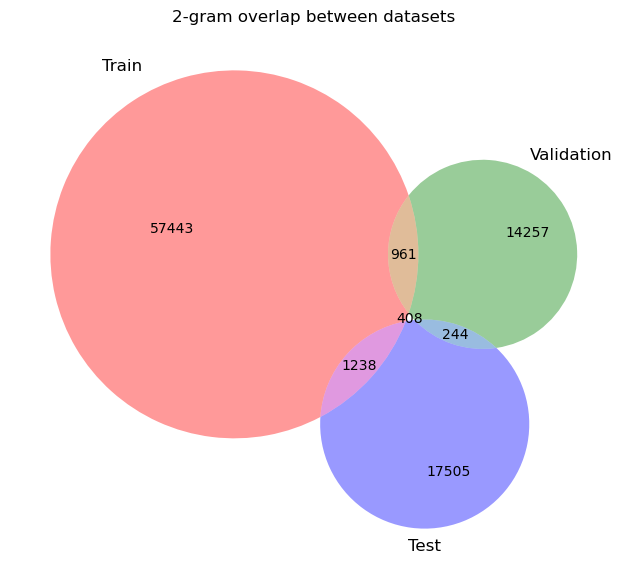

In [17]:
import json
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Load data
filename = f"../data/labeled_data/generic_test_0.json"
with open(filename) as f:
    data = json.load(f)
train_df = pd.DataFrame(data["train"])
val_df = pd.DataFrame(data["valid"])
test_df = pd.DataFrame(data["test"])

# Extract N-grams
def extract_ngrams(texts, n=3):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    vectorizer.fit_transform(texts)
    return set(vectorizer.get_feature_names_out())

train_ngrams = extract_ngrams(train_df['text'])  # Assuming 'text' is the column with the textual data
val_ngrams = extract_ngrams(val_df['text'])
test_ngrams = extract_ngrams(test_df['text'])

# Visualize using a Venn diagram
plt.figure(figsize=(10, 7))
venn3([train_ngrams, val_ngrams, test_ngrams], ('Train', 'Validation', 'Test'))
plt.title(f"2-gram overlap between datasets")
plt.show()


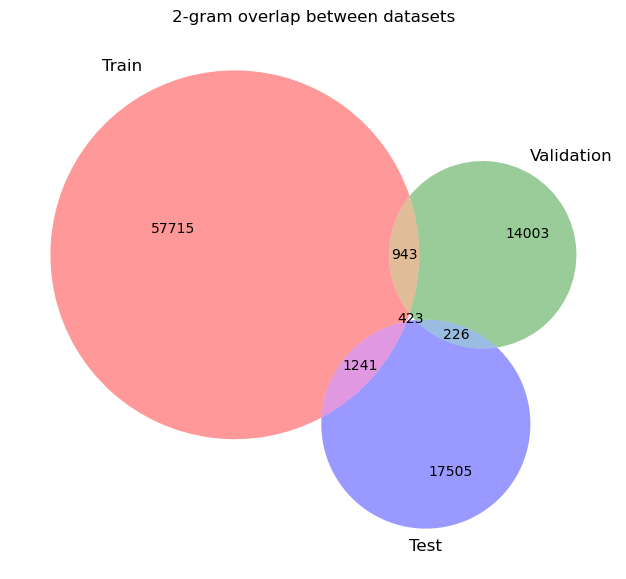

In [18]:
import json
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Load data
filename = f"../data/labeled_data/generic_test_1.json"
with open(filename) as f:
    data = json.load(f)
train_df = pd.DataFrame(data["train"])
val_df = pd.DataFrame(data["valid"])
test_df = pd.DataFrame(data["test"])

# Extract N-grams
def extract_ngrams(texts, n=3):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    vectorizer.fit_transform(texts)
    return set(vectorizer.get_feature_names_out())

train_ngrams = extract_ngrams(train_df['text'])  # Assuming 'text' is the column with the textual data
val_ngrams = extract_ngrams(val_df['text'])
test_ngrams = extract_ngrams(test_df['text'])

# Visualize using a Venn diagram
plt.figure(figsize=(10, 7))
venn3([train_ngrams, val_ngrams, test_ngrams], ('Train', 'Validation', 'Test'))
plt.title(f"2-gram overlap between datasets")
plt.show()


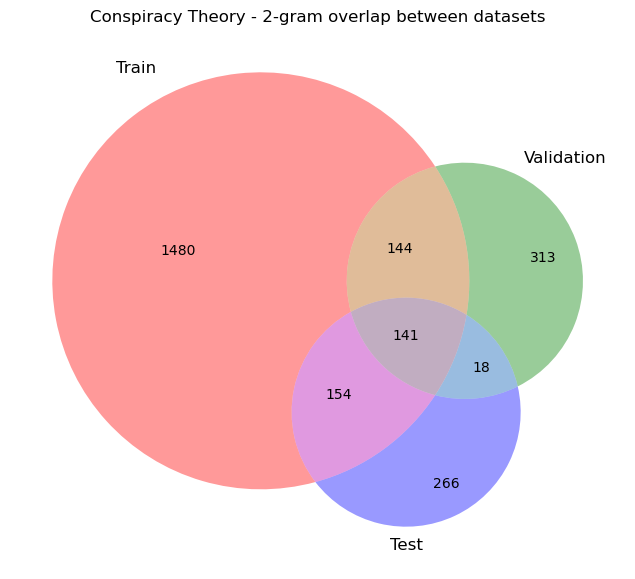

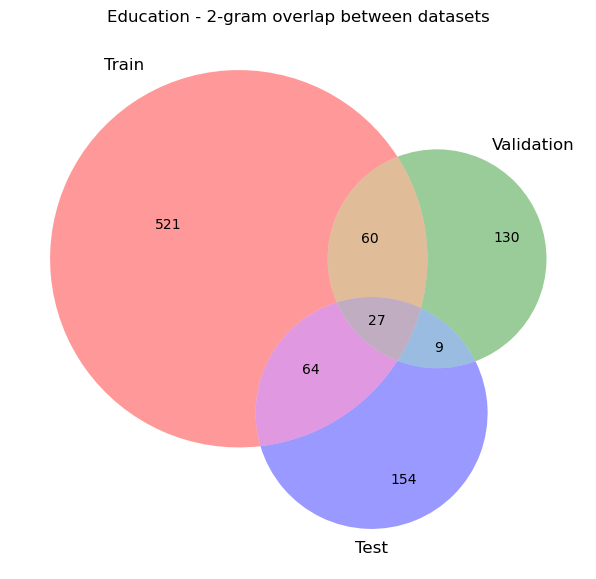

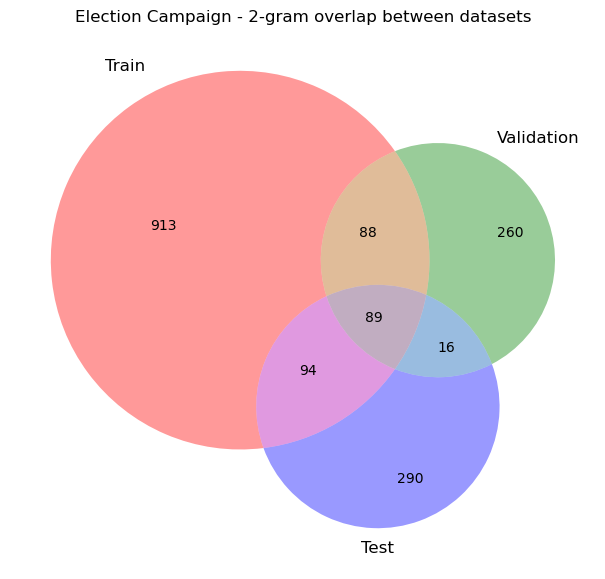

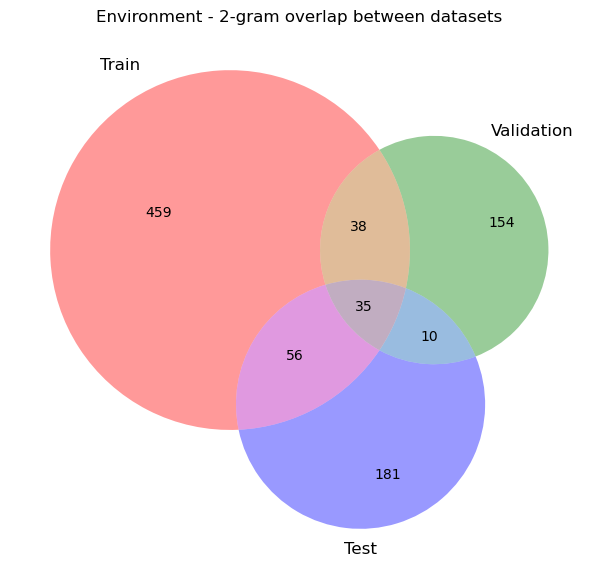

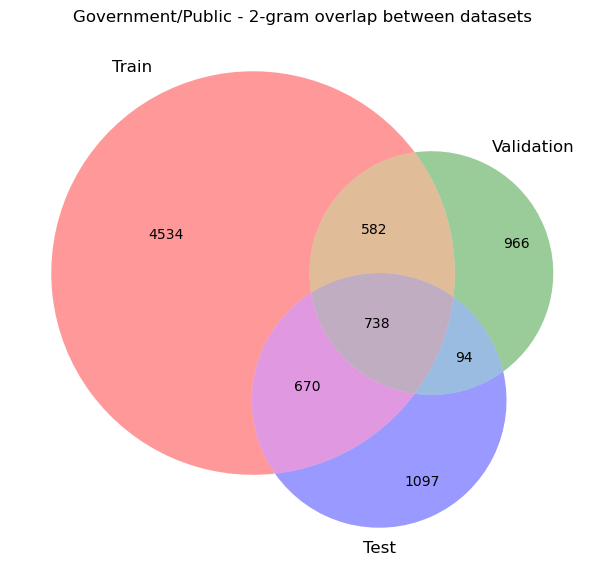

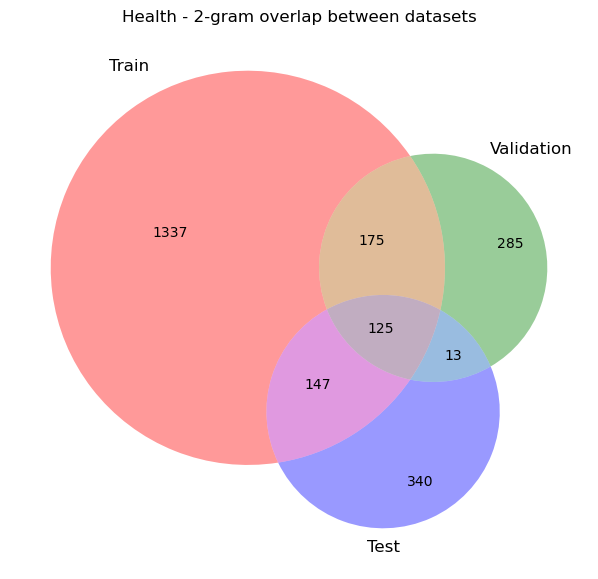

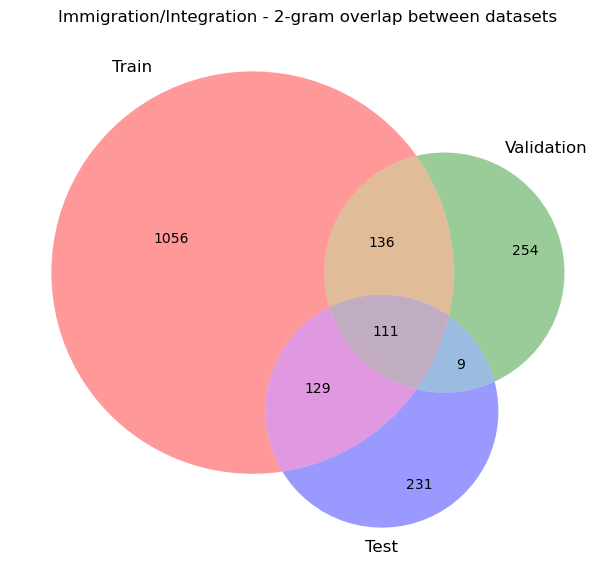

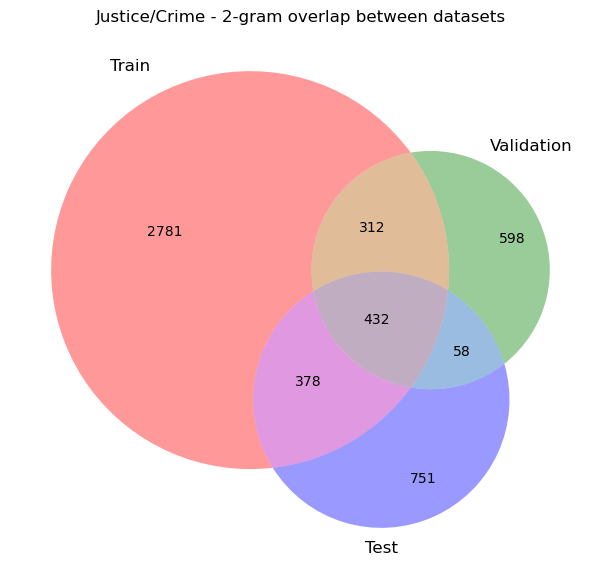

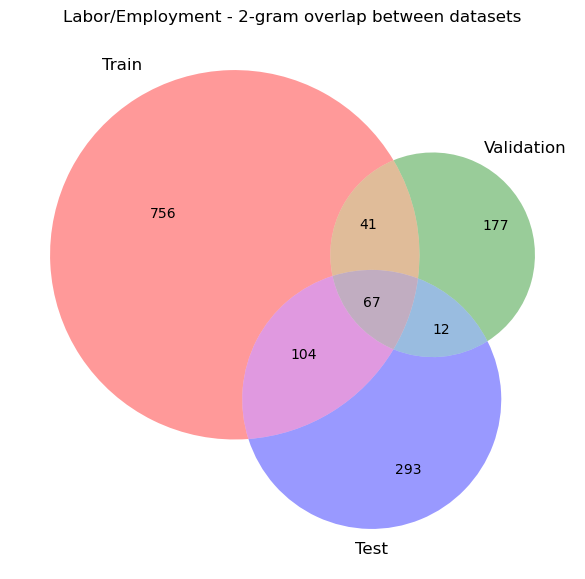

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [117]:
import json
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Load data
for k in range(5):
    filename = f"../data/labeled_data/generic_test_{k}.json"
    with open(filename) as f:
        data = json.load(f)
    train_df = pd.DataFrame(data["train"])
    val_df = pd.DataFrame(data["valid"])
    test_df = pd.DataFrame(data["test"])

    # Extract N-grams
    def extract_ngrams(texts, n=1):
        vectorizer = CountVectorizer(ngram_range=(n, n))
        vectorizer.fit_transform(texts)
        return set(vectorizer.get_feature_names_out())

    classes = [
    "Conspiracy Theory", "Education", "Election Campaign", "Environment", 
    "Government/Public", "Health", "Immigration/Integration", "Justice/Crime", 
    "Labor/Employment", "Macroeconomics / Economic Regulation", "Media/Journalism", 
    "Science/Technology", "War/Terror", "Religion", "Others"]

    for label in classes:
        # Filter dataframes based on the current class
        train_class_df = train_df[train_df['annotations'].apply(lambda x: label in x)]
        val_class_df = val_df[val_df['annotations'].apply(lambda x: label in x)]
        test_class_df = test_df[test_df['annotations'].apply(lambda x: label in x)]

        # Extract N-grams for the current class
        train_ngrams = extract_ngrams(train_class_df['text'])
        val_ngrams = extract_ngrams(val_class_df['text'])
        test_ngrams = extract_ngrams(test_class_df['text'])

        # Visualize using a Venn diagram
        plt.figure(figsize=(10, 7))
        venn3([train_ngrams, val_ngrams, test_ngrams], ('Train', 'Validation', 'Test'))
        plt.title(f"{label} - 2-gram overlap between datasets")
        plt.show()


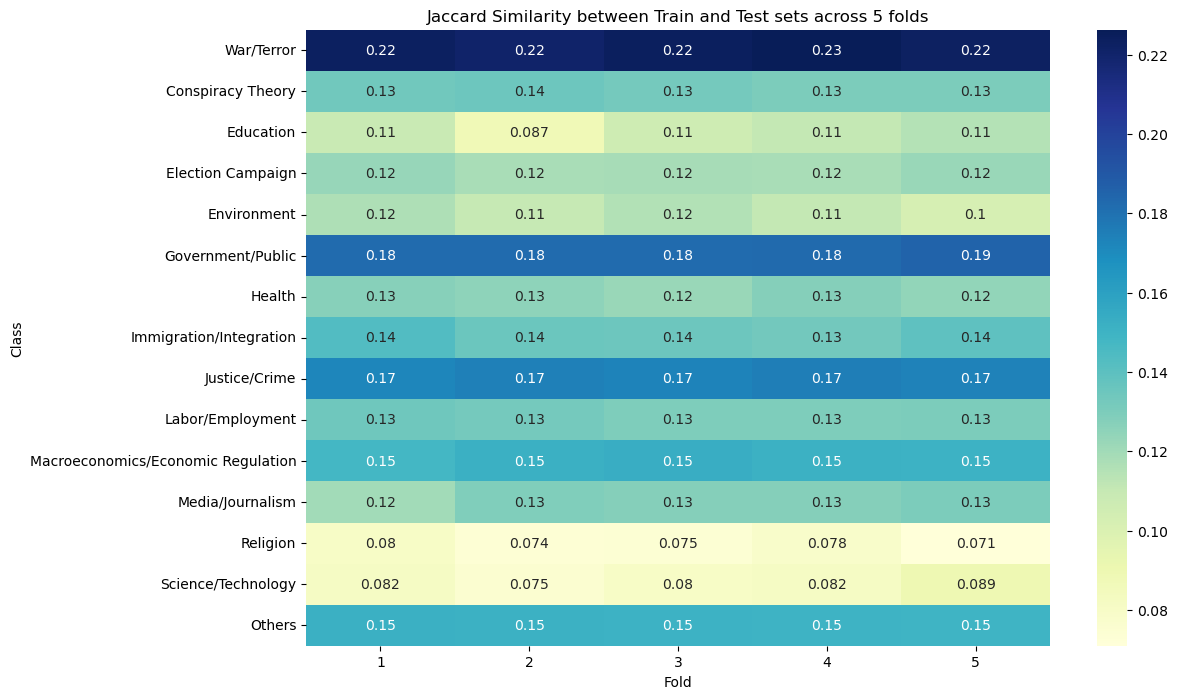

In [26]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Function to compute Jaccard similarity
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

# Extract N-grams
def extract_ngrams(texts, n=1):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    vectorizer.fit_transform(texts)
    return set(vectorizer.get_feature_names_out())

classes = ["War/Terror", "Conspiracy Theory", "Education", "Election Campaign", "Environment", 
           "Government/Public", "Health", "Immigration/Integration", 
           "Justice/Crime", "Labor/Employment", 
           "Macroeconomics/Economic Regulation", "Media/Journalism", "Religion", 
           "Science/Technology", "Others"]

# Initialize a matrix to store Jaccard similarities
jaccard_matrix = np.zeros((len(classes), 5))

for k in range(5):
    filename = f"../data/labeled_data/generic_test_{k}.json"
    with open(filename) as f:
        data = json.load(f)
    train_df = pd.DataFrame(data["train"])
    val_df = pd.DataFrame(data["valid"])
    test_df = pd.DataFrame(data["test"])

    for idx, label in enumerate(classes):
        # Filter dataframes based on the current class
        train_class_df = train_df[train_df['annotations'].apply(lambda x: label in x)]
        val_class_df = val_df[val_df['annotations'].apply(lambda x: label in x)]
        test_class_df = test_df[test_df['annotations'].apply(lambda x: label in x)]

        # Extract N-grams for the current class
        train_ngrams = extract_ngrams(train_class_df['text'])
        val_ngrams = extract_ngrams(val_class_df['text'])
        test_ngrams = extract_ngrams(test_class_df['text'])

        # Compute Jaccard similarity between train and test sets
        jaccard_matrix[idx, k] = jaccard_similarity(train_ngrams, test_ngrams)

# Visualize using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(jaccard_matrix, annot=True, cmap='YlGnBu', xticklabels=range(1, 6), yticklabels=classes)
plt.xlabel('Fold')
plt.ylabel('Class')
plt.title('Jaccard Similarity between Train and Test sets across 5 folds')
plt.show()

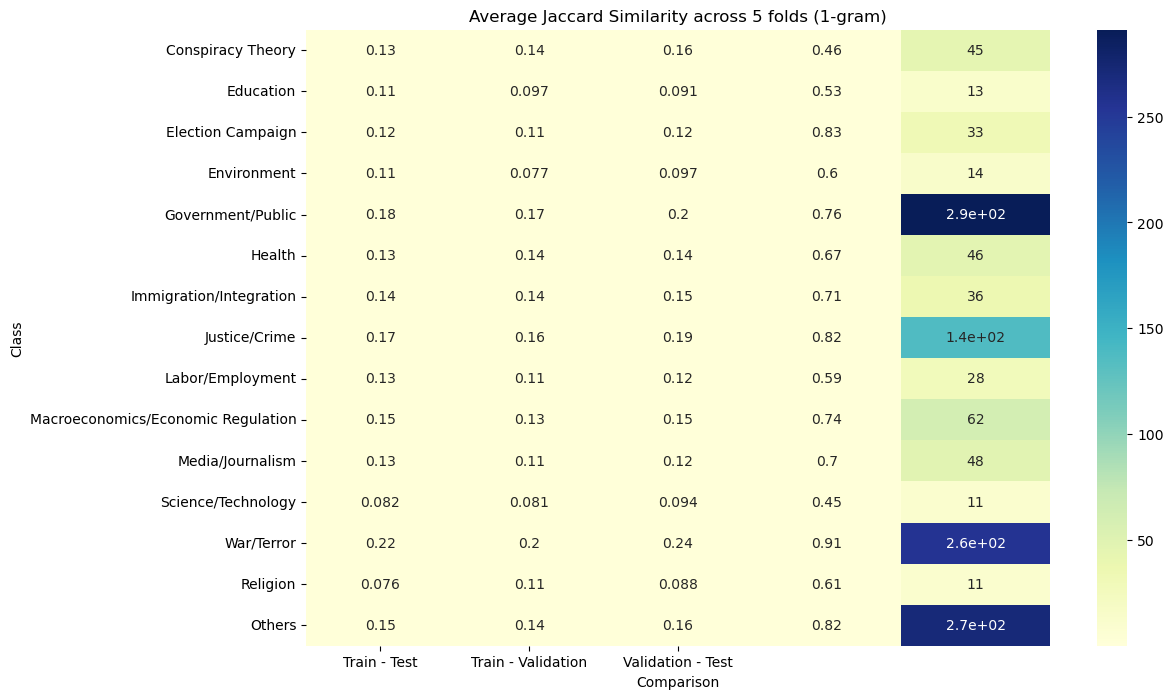

In [26]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Function to compute Jaccard similarity
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

# Extract N-grams
def extract_ngrams(texts, n=1):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    vectorizer.fit_transform(texts)
    return set(vectorizer.get_feature_names_out())

classes = ["Conspiracy Theory", "Education", "Election Campaign" , "Environment",  
           "Government/Public", "Health", "Immigration/Integration", 
           "Justice/Crime", "Labor/Employment", 
           "Macroeconomics/Economic Regulation", "Media/Journalism", "Science/Technology",
           "War/Terror", "Religion", "Others"]

# Initialize matrices to store Jaccard similarities
jaccard_train_test = np.zeros(len(classes))
jaccard_train_val = np.zeros(len(classes))
jaccard_val_test = np.zeros(len(classes))

for k in range(5):
    filename = f"../data/labeled_data/generic_test_{k}.json"
    with open(filename) as f:
        data = json.load(f)
    train_df = pd.DataFrame(data["train"])
    val_df = pd.DataFrame(data["valid"])
    test_df = pd.DataFrame(data["test"])

    for idx, label in enumerate(classes):
        # Filter dataframes based on the current class
        train_class_df = train_df[train_df['annotations'].apply(lambda x: label in x)]
        val_class_df = val_df[val_df['annotations'].apply(lambda x: label in x)]
        test_class_df = test_df[test_df['annotations'].apply(lambda x: label in x)]

        # Extract N-grams for the current class
        train_ngrams = extract_ngrams(train_class_df['text'])
        val_ngrams = extract_ngrams(val_class_df['text'])
        test_ngrams = extract_ngrams(test_class_df['text'])

        # Compute Jaccard similarities
        jaccard_train_test[idx] += jaccard_similarity(train_ngrams, test_ngrams)
        jaccard_train_val[idx] += jaccard_similarity(train_ngrams, val_ngrams)
        jaccard_val_test[idx] += jaccard_similarity(val_ngrams, test_ngrams)

# Average the Jaccard similarities
jaccard_train_test /= 5
jaccard_train_val /= 5
jaccard_val_test /= 5

# Combine the results into a single matrix for visualization
jaccard_matrix = np.vstack([jaccard_train_test, jaccard_train_val, jaccard_val_test]).T

f1_scores = [
    0.46, 0.53, 0.83, 0.60, 0.76, 0.67, 0.71, 0.82, 0.59, 0.74, 0.70, 0.45, 0.91, 0.61, 0.82#, 0.78, 0.68
]

support = [45, 13, 33, 14, 291, 46, 36, 137, 28, 62, 48, 11, 255, 11, 271]

heatmap_data = pd.DataFrame(columns=['Train-Test', 'Train-Validation', 'Validation-Test'], data=jaccard_matrix)

# Assuming the labels in heatmap_data and the provided F1-score and Support values are in the same order
heatmap_data['F1-score'] = f1_scores
# Normalize the Support column
heatmap_data['Support'] = support

# Visualize using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', xticklabels=['Train - Test', 'Train - Validation', 'Validation - Test'], yticklabels=classes)
plt.xlabel('Comparison')
plt.ylabel('Class')
plt.title('Average Jaccard Similarity across 5 folds (1-gram)')
plt.show()

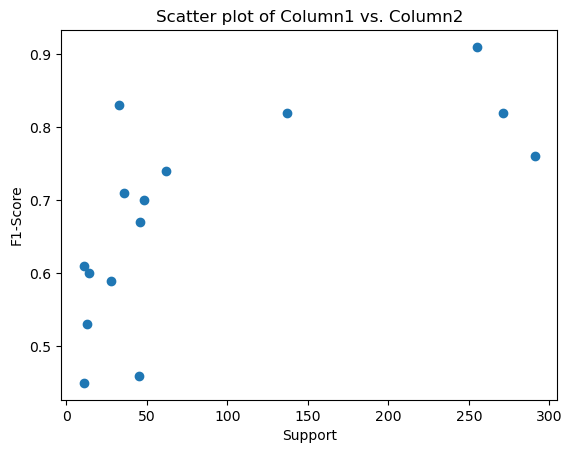

In [27]:
plt.scatter(heatmap_data['Support'], heatmap_data['F1-score'])
plt.xlabel('Support')
plt.ylabel('F1-Score')
plt.title('Scatter plot of Column1 vs. Column2')
plt.show()

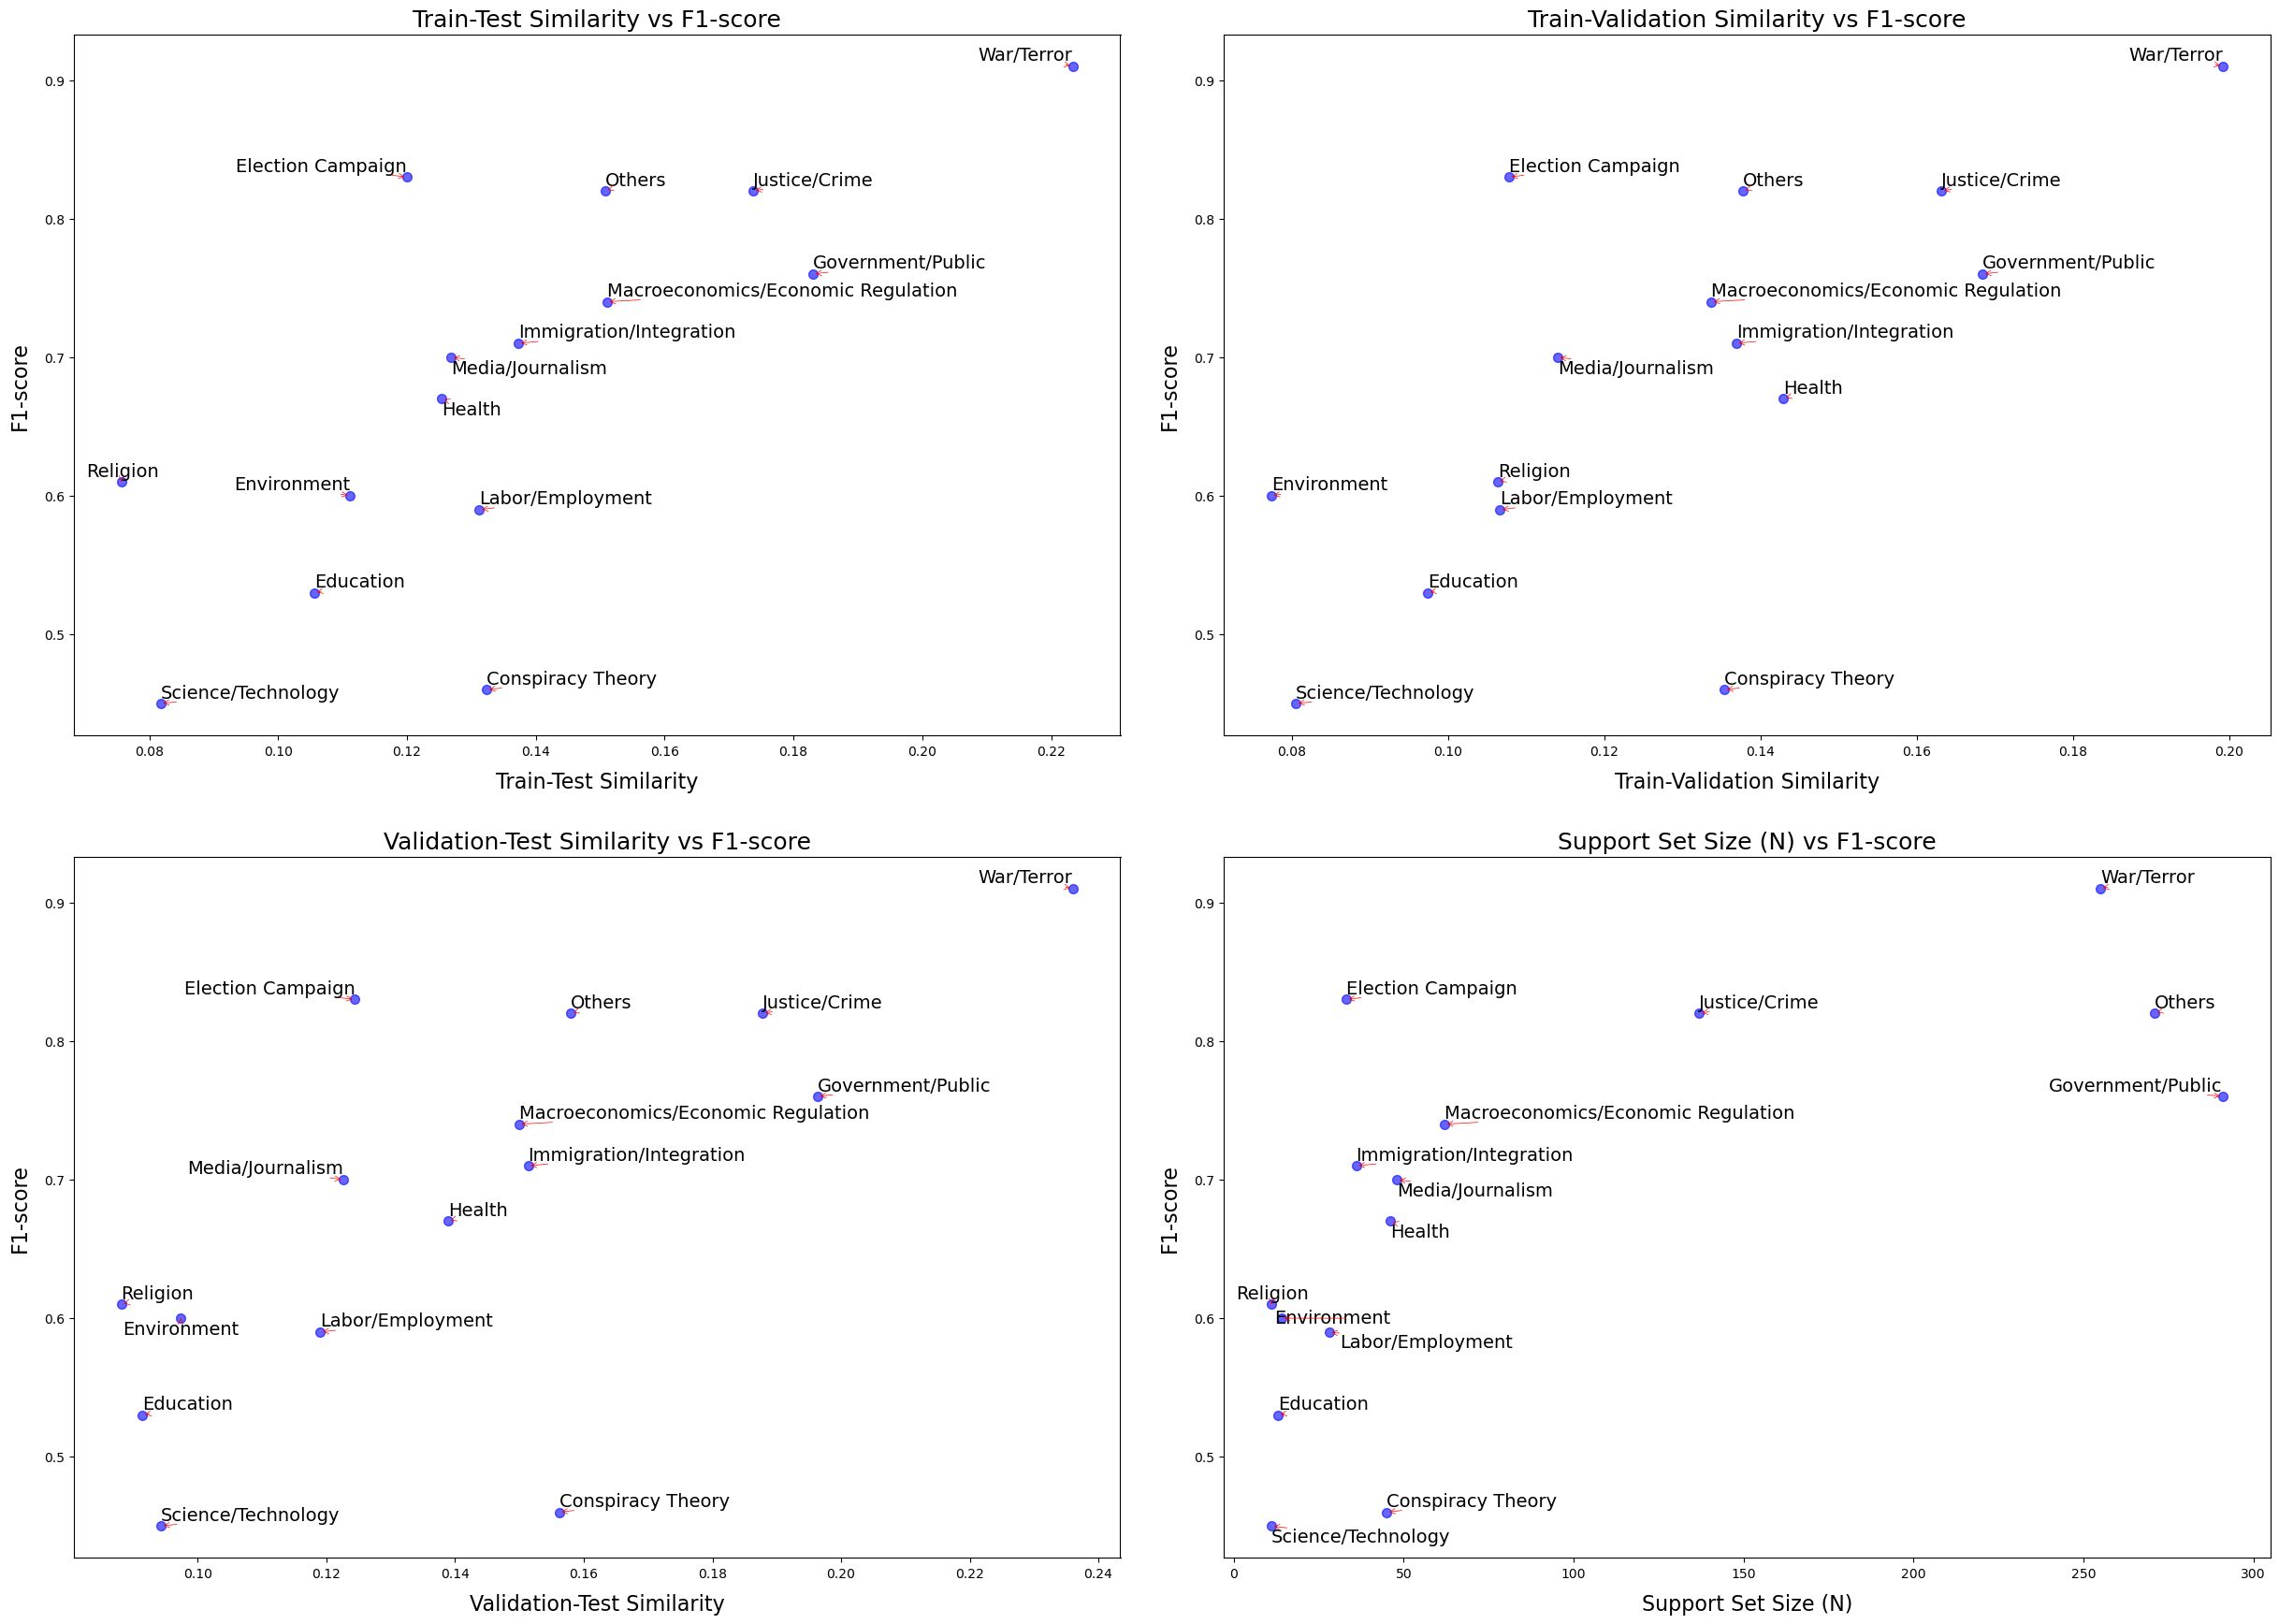

In [30]:
heatmap_data["Classes"] = classes
from adjustText import adjust_text# Sort the dataframe by F1-score
df = heatmap_data.sort_values(by='F1-score').reset_index(drop=True)

# Get the top 3 and bottom 3 classes based on F1-score
top_3 = df.head(1000)
#bottom_3 = df.tail(5)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(25,18))

columns = ['Train-Test Similarity', 'Train-Validation Similarity', 'Validation-Test Similarity', 'Support Set Size (N)']

# Original dataframe column names (used for indexing)
original_columns = ['Train-Test', 'Train-Validation', 'Validation-Test', 'Support']


for ax, (col, orig_col) in zip(axes.ravel(), zip(columns, original_columns)):
    ax.scatter(df[orig_col], df['F1-score'], color='blue', alpha=0.6, s=50)  # s=50 sets the dot size
    ax.set_xlabel(col, labelpad=10, fontsize=16)  # labelpad adds margin, fontsize adjusts text size
    ax.set_ylabel('F1-score', labelpad=10, fontsize=16)
    ax.set_title(f'{col} vs F1-score', fontsize=18)  # fontsize adjusts title size

    ax.tick_params(axis='both', labelsize=10)
    
    # Adding text labels for top 3 and bottom 3
    texts = []
    for i, row in top_3.iterrows():
        texts.append(ax.text(row[orig_col], row['F1-score'], row['Classes'], fontsize=14))
    """for i, row in bottom_3.iterrows():
        texts.append(ax.text(row[orig_col], row['F1-score'], row['Classes'], fontsize=14))"""
    
    # Adjusting the text to prevent overlap for each subplot
    adjust_text(texts, ax=ax, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

plt.tight_layout(pad=3.0)
plt.show()


In [19]:
import json
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import numpy as np
from scipy.stats import entropy
import nltk
import math

results = []

for k in range(5):
    filename = f"../data/labeled_data/generic_test_{k}.json"
    with open(filename) as f:
        data = json.load(f)
    train_df = pd.DataFrame(data["train"])
    val_df = pd.DataFrame(data["valid"])
    test_df = pd.DataFrame(data["test"])

    for idx, label in enumerate(classes):
        # Filter dataframes based on the current class
        train_class_df = train_df[train_df['annotations'].apply(lambda x: label in x)]
        val_class_df = val_df[val_df['annotations'].apply(lambda x: label in x)]
        test_class_df = test_df[test_df['annotations'].apply(lambda x: label in x)]

        # Vocabulary Diversity: Type-Token Ratio (TTR)
        def compute_ttr(texts):
            tokens = ' '.join(texts).split()
            types = set(tokens)
            return len(types) / len(tokens)

        def compute_moving_avg_ttr(texts, window_size=100):
            tokens = ' '.join(texts).split()
            num_windows = len(tokens) - window_size + 1
            if num_windows <= 0:
                return compute_ttr(texts)  # If text is shorter than window, compute regular TTR
            ttr_values = []
            for i in range(num_windows):
                window_tokens = tokens[i:i+window_size]
                types = set(window_tokens)
                ttr = len(types) / len(window_tokens)
                ttr_values.append(ttr)
            return np.mean(ttr_values)

        # Sentence Length Variability
        def compute_sentence_length_std(texts):
            sentence_lengths = [len(sentence.split()) for sentence in texts]
            return np.std(sentence_lengths)

        """# Topic Modeling: Number of Distinct Topics
        def compute_topic_diversity(texts):
            texts = [text.split() for text in texts]
            dictionary = Dictionary(texts)
            corpus = [dictionary.doc2bow(text) for text in texts]
            lda = LdaModel(corpus, num_topics=10, id2word=dictionary)
            # Here, you can extract more detailed information about the topics if needed
            return len(lda.print_topics())"""

        # Entropy
        def compute_entropy(texts):
            tokens = ' '.join(texts).split()
            freq_dist = nltk.FreqDist(tokens)
            probs = [freq/len(tokens) for freq in freq_dist.values()]
            return entropy(probs)

        dataset_types = ['train', 'validation', 'test']

        for df, dataset_type in zip([train_class_df, val_class_df, test_class_df], dataset_types):
            ttr = compute_ttr(df['text'])
            moving_avg_ttr = compute_moving_avg_ttr(df['text'])
            sentence_std = compute_sentence_length_std(df['text'])
            ent = compute_entropy(df['text'])
            results.append((label, dataset_type, ttr, moving_avg_ttr, sentence_std, ent))

# Convert the results to a DataFrame for easier analysis
results_df = pd.DataFrame(results, columns=['Label', 'Dataset_Type', 'TTR', 'Moving_Avg_TTR', 'Sentence_Length_Std', 'Entropy'])
average_results_df = results_df.groupby(['Dataset_Type', 'Label']).mean().reset_index()

NameError: name 'classes' is not defined

In [ ]:
average_results_df

Dataset_Type                               Label       TTR  Moving_Avg_TTR  \
0          test                   Conspiracy Theory  0.644596        0.846886   
1          test                           Education  0.725849        0.851620   
2          test                   Election Campaign  0.683951        0.855893   
3          test                         Environment  0.690745        0.816977   
4          test                   Government/Public  0.547425        0.857754   
5          test                              Health  0.639854        0.810131   
6          test             Immigration/Integration  0.667081        0.828669   
7          test                       Justice/Crime  0.519168        0.830267   
8          test                    Labor/Employment  0.633129        0.822696   
9          test  Macroeconomics/Economic Regulation  0.663028        0.859059   
10         test                    Media/Journalism  0.692589        0.860372   
11         test                              Others  0.572609        0.878205   
12         test                            Religion  0.810409        0.901471   
13         test                  Science/Technology  0.798077        0.850642   
14         test                          War/Terror  0.438993        0.811567   
15        train                   Conspiracy Theory  0.499742        0.828315   
16        train                           Education  0.636895        0.830467   
17        train                   Election Campaign  0.584789        0.856157   
18        train                         Environment  0.698270        0.860700   
19        train                   Government/Public  0.427998        0.862003   
20        train                              Health  0.511026        0.838850   
21        train             Immigration/Integration  0.521400        0.834659   
22        train                       Justice/Crime  0.420167        0.840209   
23        train                    Labor/Employment  0.606145        0.843794   
24        train  Macroeconomics/Economic Regulation  0.527055        0.835769   
25        train                    Media/Journalism  0.604140        0.869901   
26        train                              Others  0.468632        0.874878   
27        train                            Religion  0.670757        0.857613   
28        train                  Science/Technology  0.693196        0.853033   
29        train                          War/Terror  0.329857        0.809299   
30   validation                   Conspiracy Theory  0.630131        0.826958   
31   validation                           Education  0.752872        0.835060   
32   validation                   Election Campaign  0.713319        0.856252   
33   validation                         Environment  0.800469        0.871517   
34   validation                   Government/Public  0.563725        0.861263   
35   validation                              Health  0.649615        0.842484   
36   validation             Immigration/Integration  0.652436        0.837890   
37   validation                       Justice/Crime  0.552530        0.839510   
38   validation                    Labor/Employment  0.732106        0.842117   
39   validation  Macroeconomics/Economic Regulation  0.657631        0.837713   
40   validation                    Media/Journalism  0.726769        0.867009   
41   validation                              Others  0.595631        0.874427   
42   validation                            Religion  0.801486        0.877092   
43   validation                  Science/Technology  0.800372        0.856614   
44   validation                          War/Terror  0.464783        0.811350   

    Sentence_Length_Std   Entropy  
0              8.954921  5.978033  
1             12.016754  5.348504  
2             12.250148  5.925542  
3             10.532990  5.373562  
4             10.642222  7.154008  
5             11.380596  5.950795  
6             12.528086 

In [20]:
# Assuming your pivot result is stored in a variable called pivot_df
pivot_df = average_results_df.pivot(index='Label', columns='Dataset_Type', values='TTR')

# Reorder the rows based on the classes list
ordered_df = pivot_df.reindex(classes)

heatmap_data = 1-ordered_df

# Add F1-score and Support columns
support = [45, 13, 33, 14, 291, 46, 36, 137, 28, 62, 48, 11, 255, 11, 271]

# Assuming the labels in heatmap_data and the provided F1-score and Support values are in the same order
heatmap_data['F1-score'] = f1_scores
# Normalize the Support column
heatmap_data['Support'] = support
heatmap_data['Support'] = (heatmap_data['Support'] - heatmap_data['Support'].min()) / (heatmap_data['Support'].max() - heatmap_data['Support'].min())


# Visualize using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.title('Metrics across Different Dataset Types')
plt.show()

NameError: name 'average_results_df' is not defined

In [21]:
ordered_df

NameError: name 'ordered_df' is not defined

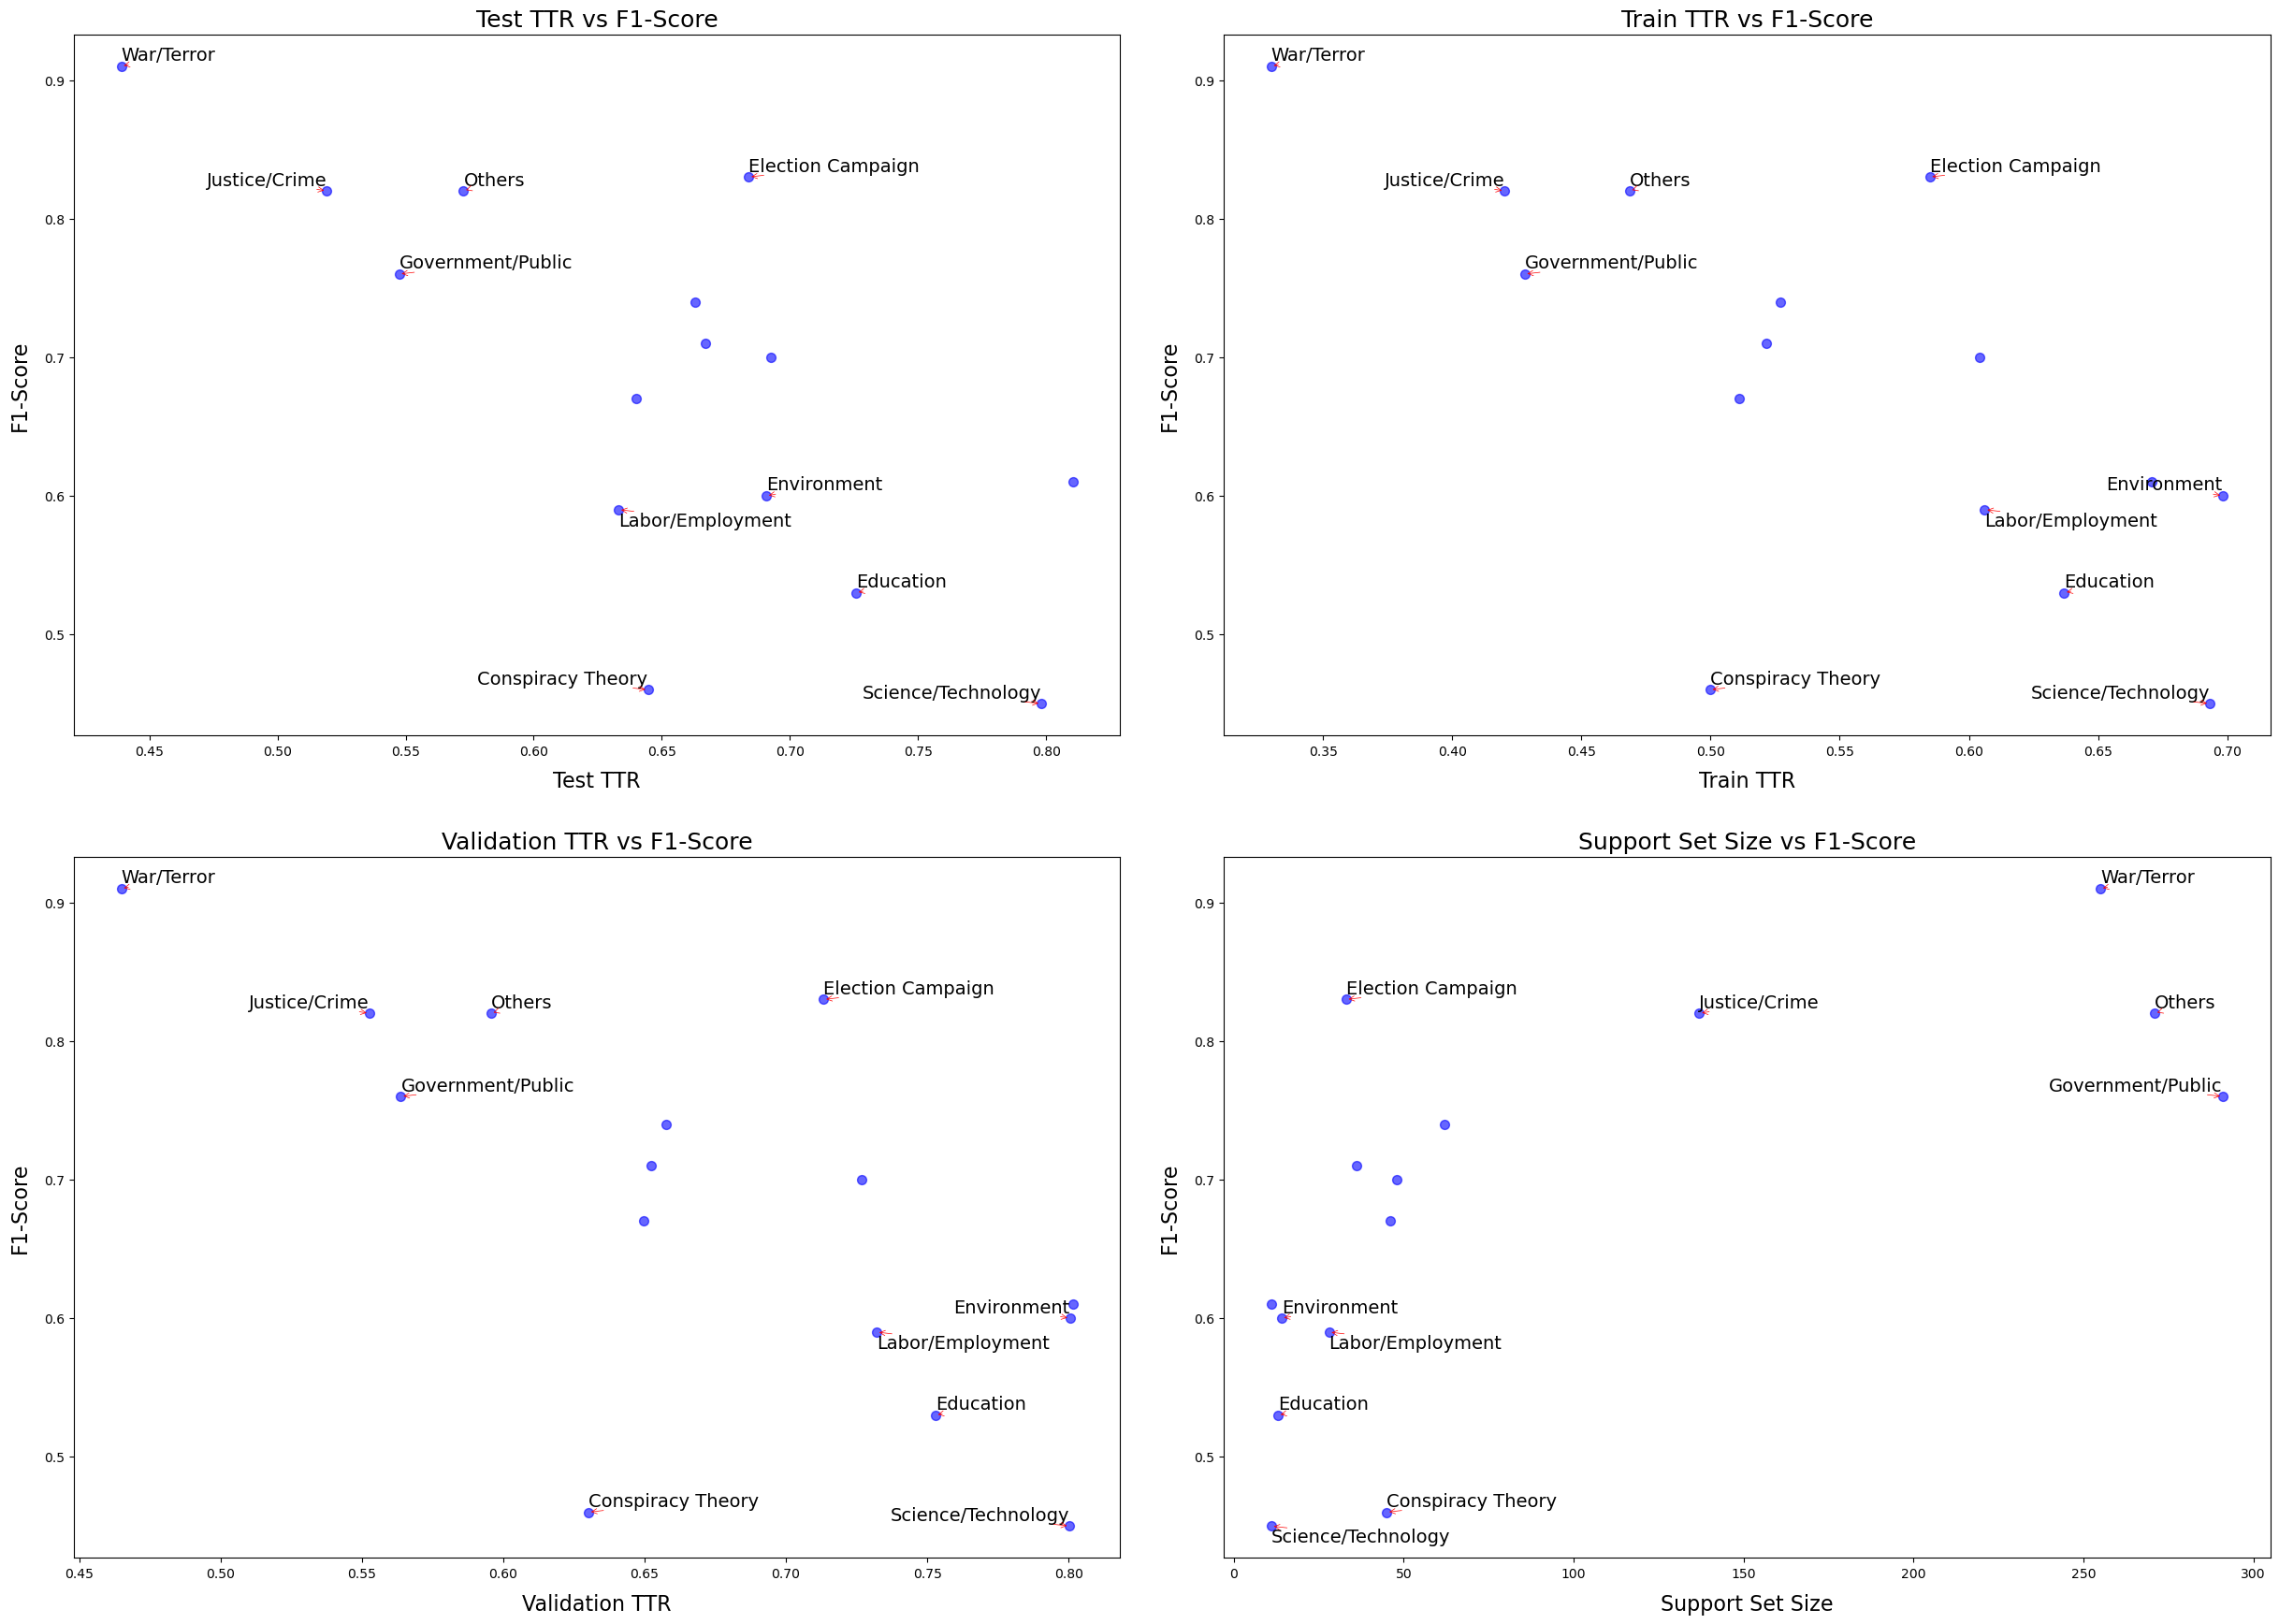

In [24]:
from adjustText import adjust_text# Sort the dataframe by F1-score
pivot_df = average_results_df.pivot(index='Label', columns='Dataset_Type', values='TTR')
# Reorder the rows based on the classes list
ordered_df = pivot_df.reindex(classes)
# Add F1-score and Support columns
support = [45, 13, 33, 14, 291, 46, 36, 137, 28, 62, 48, 11, 255, 11, 271]

# Assuming the labels in heatmap_data and the provided F1-score and Support values are in the same order
ordered_df['F1-Score'] = f1_scores
# Normalize the Support column
ordered_df['Support'] = support


heatmap_data = ordered_df
heatmap_data["Classes"] = classes

df = heatmap_data.sort_values(by='F1-Score').reset_index(drop=True)

# Get the top 3 and bottom 3 classes based on F1-score
top_3 = df.head(5)
bottom_3 = df.tail(5)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(25,18))

columns = ['Test TTR', 'Train TTR', 'Validation TTR', 'Support Set Size']

# Original dataframe column names (used for indexing)
original_columns = ['test', 'train', 'validation', 'Support']


for ax, (col, orig_col) in zip(axes.ravel(), zip(columns, original_columns)):
    ax.scatter(df[orig_col], df['F1-Score'], color='blue', alpha=0.6, s=50)  # s=50 sets the dot size
    ax.set_xlabel(col, labelpad=10, fontsize=16)  # labelpad adds margin, fontsize adjusts text size
    ax.set_ylabel('F1-Score', labelpad=10, fontsize=16)
    ax.set_title(f'{col} vs F1-Score', fontsize=18)  # fontsize adjusts title size

    ax.tick_params(axis='both', labelsize=10)
    
    # Adding text labels for top 3 and bottom 3
    texts = []
    for i, row in top_3.iterrows():
        texts.append(ax.text(row[orig_col], row['F1-Score'], row['Classes'], fontsize=14))
    for i, row in bottom_3.iterrows():
        texts.append(ax.text(row[orig_col], row['F1-Score'], row['Classes'], fontsize=14))
    
    # Adjusting the text to prevent overlap for each subplot
    adjust_text(texts, ax=ax, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

plt.tight_layout(pad=3.0)
plt.show()


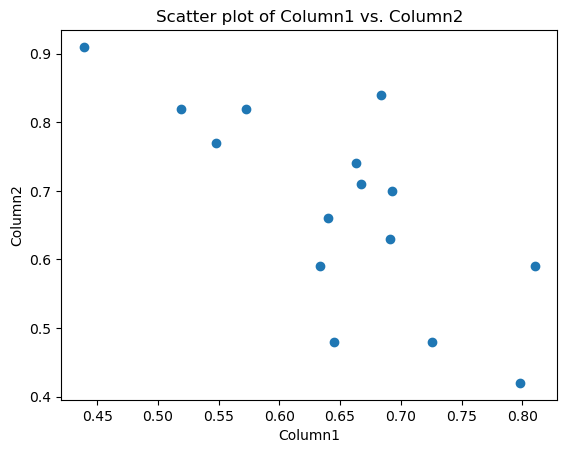

In [159]:
import matplotlib.pyplot as plt

plt.scatter(heatmap_data['test'], heatmap_data['F1-score'])
plt.xlabel('Column1')
plt.ylabel('Column2')
plt.title('Scatter plot of Column1 vs. Column2')
plt.show()

In [51]:
average_results_df = results_df.groupby(['Dataset_Type', 'Label']).mean().reset_index()
print(average_results_df)

   Dataset_Type                               Label       TTR  \
0          test                   Conspiracy Theory  0.644596   
1          test                           Education  0.725849   
2          test                   Election Campaign  0.683951   
3          test                         Environment  0.690745   
4          test                   Government/Public  0.547425   
5          test                              Health  0.639854   
6          test             Immigration/Integration  0.667081   
7          test                       Justice/Crime  0.519168   
8          test                    Labor/Employment  0.633129   
9          test  Macroeconomics/Economic Regulation  0.663028   
10         test                    Media/Journalism  0.692589   
11         test                              Others  0.572609   
12         test                            Religion  0.810409   
13         test                  Science/Technology  0.798077   
14         test          

In [62]:
results_df[results_df["Dataset_Type"] == "train"].groupby("Label").mean()

/tmp/ipykernel_120002/1934410098.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results_df[results_df["Dataset_Type"] == "train"].groupby("Label").mean()


index       TTR  Sentence_Length_Std  \
Label                                                                      
Conspiracy Theory                    93.0  0.499742            11.014373   
Education                            96.0  0.636895            11.794695   
Election Campaign                    99.0  0.584789            12.031503   
Environment                         102.0  0.698270            11.350337   
Government/Public                   105.0  0.427998            10.639997   
Health                              108.0  0.511026            10.445419   
Immigration/Integration             111.0  0.521400            11.405733   
Justice/Crime                       114.0  0.420167            13.612711   
Labor/Employment                    117.0  0.606145            11.244442   
Macroeconomics/Economic Regulation  120.0  0.527055            11.090231   
Media/Journalism                    123.0  0.604140             9.775720   
Others                              132.0  0.468632            10.245892   
Religion                            126.0  0.670757            11.531168   
Science/Technology                  129.0  0.693196            11.596289   
War/Terror                           90.0  0.329857            10.106442   

                                    Topic_Diversity   Entropy  
Label                                                          
Conspiracy Theory                              10.0  6.767084  
Education                                      10.0  6.084020  
Election Campaign                              10.0  6.614830  
Environment                                    10.0  6.106726  
Government/Public                              10.0  7.779514  
Health                                         10.0  6.791359  
Immigration/Integration                        10.0  6.603044  
Justice/Crime                                  10.0  7.271633  
Labor/Employment                               10.0  6.390349  
Macroeconomics/Economic Regulation             10.0  6.853287  
Media/Journalism                               10.0  6.843159  
Others                                         10.0  7.711197  
Religion                                       10.0  6.230055  
Science/Technology                             10.0  6.107864  
War/Terror                                     10.0  7.079501

In [59]:
results_df.reset_index(inplace=True)

# Pivot the dataframe
pivot_df = results_df.pivot(index='Label', columns='Dataset_Type', values='TTR')

# Plot the stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xticks(rotation=45)
plt.show()

ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Load data
filename = f"../data/labeled_data/generic_test_3.json"
with open(filename) as f:
    data = json.load(f)
train_df = pd.DataFrame(data["train"])
val_df = pd.DataFrame(data["valid"])
test_df = pd.DataFrame(data["test"])



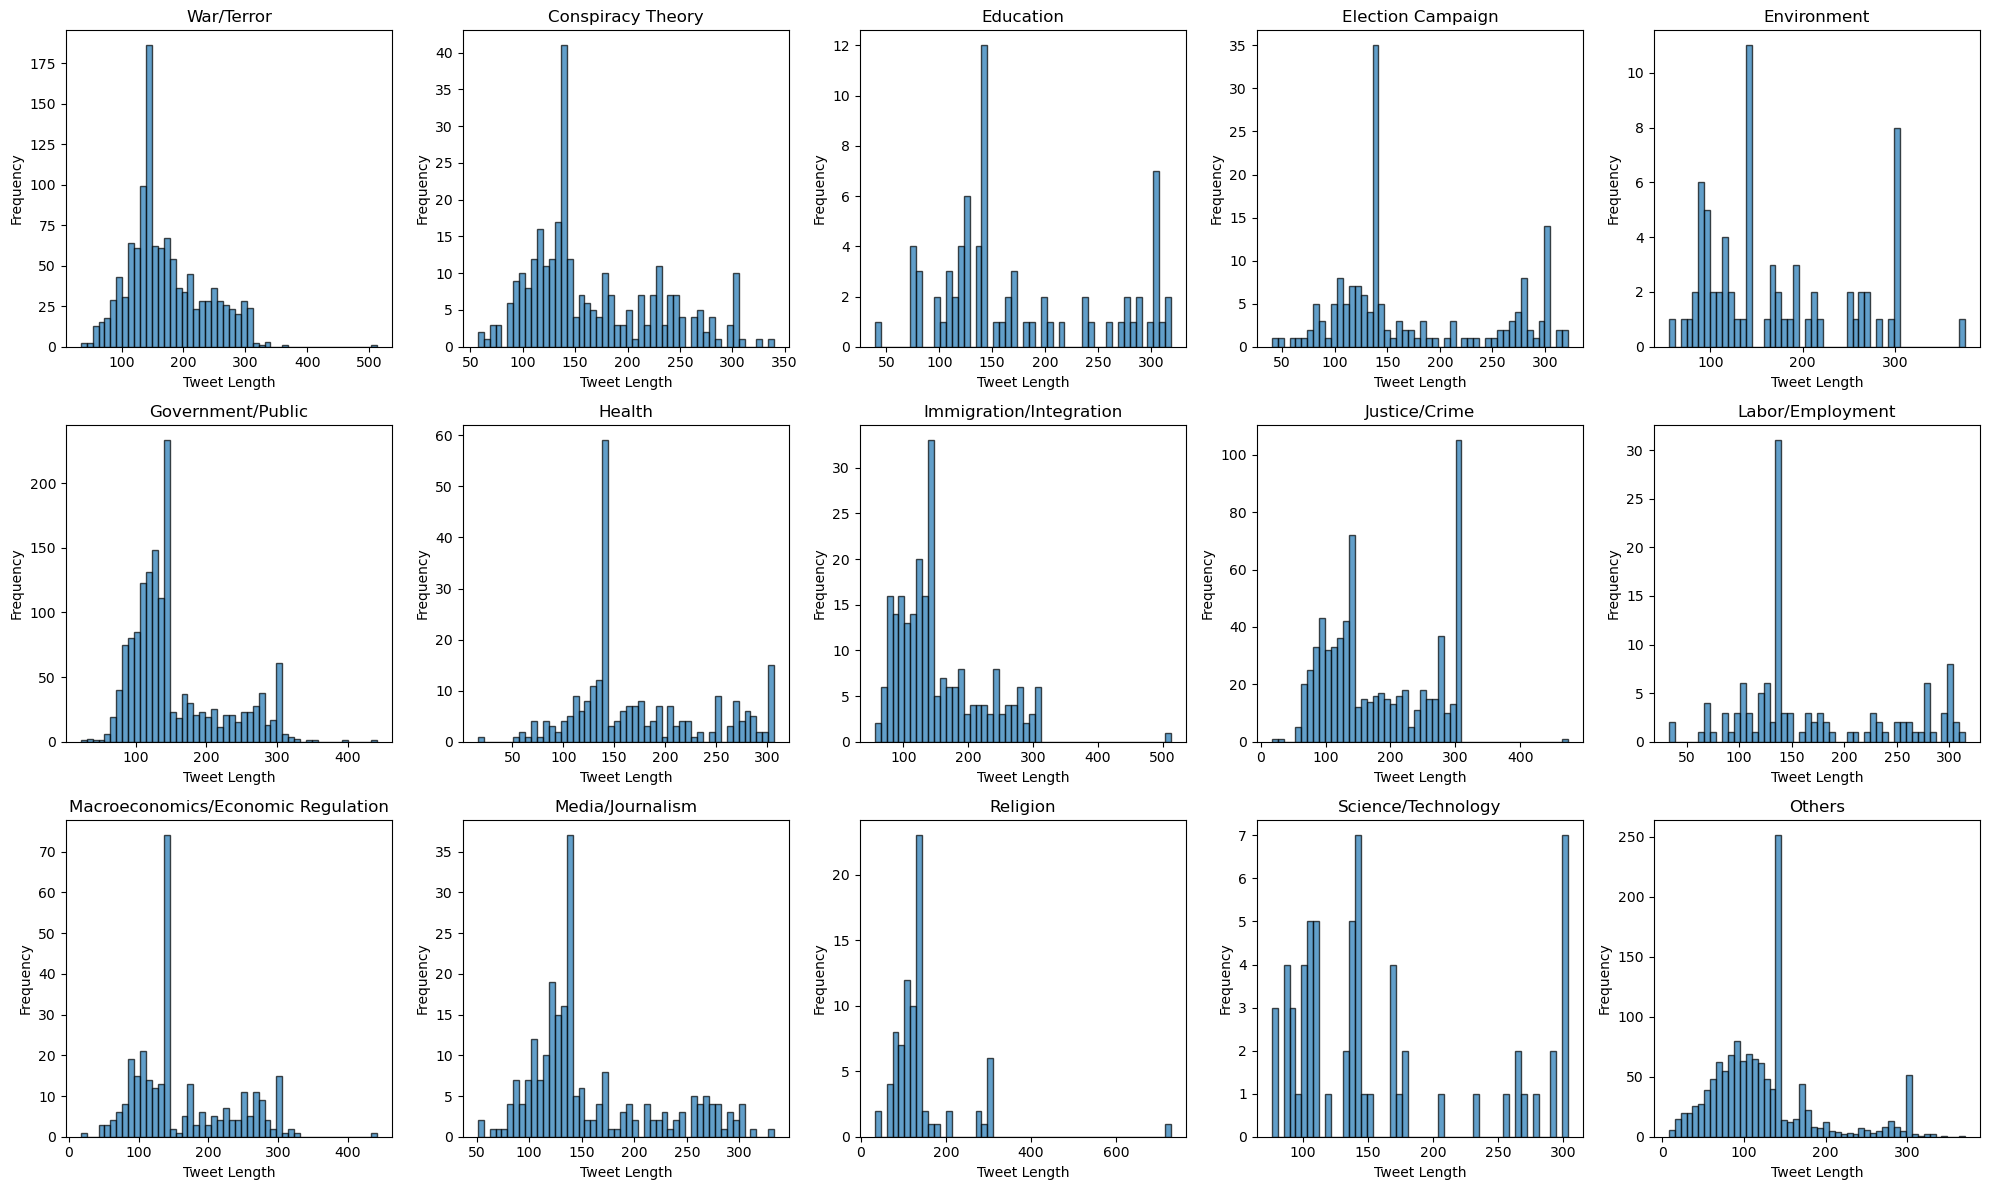

In [82]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the classes
classes = ["War/Terror", "Conspiracy Theory", "Education", "Election Campaign", "Environment", 
           "Government/Public", "Health", "Immigration/Integration", 
           "Justice/Crime", "Labor/Employment", 
           "Macroeconomics/Economic Regulation", "Media/Journalism", "Religion", 
           "Science/Technology", "Others"]

# Load data
filename = f"../data/labeled_data/generic_test_{k}.json"
with open(filename) as f:
    data = json.load(f)
train_df = pd.DataFrame(data["train"])
val_df = pd.DataFrame(data["valid"])
test_df = pd.DataFrame(data["test"])

# Create histograms for each class
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))

for idx, label in enumerate(classes):
    # Determine the row and column for the current plot
    row = idx // 5
    col = idx % 5
    
    # Filter dataframes based on the current class
    train_class_df = train_df[train_df['annotations'].apply(lambda x: label in x)]
    val_class_df = val_df[val_df['annotations'].apply(lambda x: label in x)]
    test_class_df = test_df[test_df['annotations'].apply(lambda x: label in x)]
    
    # Concatenate the datasets and extract sentence lengths
    dfs_all = pd.concat([train_class_df, val_class_df, test_class_df])
    dfs_all_lengths = dfs_all['text'].apply(len)
    
    # Plot the histogram
    axes[row, col].hist(dfs_all_lengths, bins=50, edgecolor='black', alpha=0.7)
    axes[row, col].set_title(f"{label}")
    axes[row, col].set_ylabel("Frequency")
    axes[row, col].set_xlabel("Tweet Length")

plt.tight_layout()
plt.show()


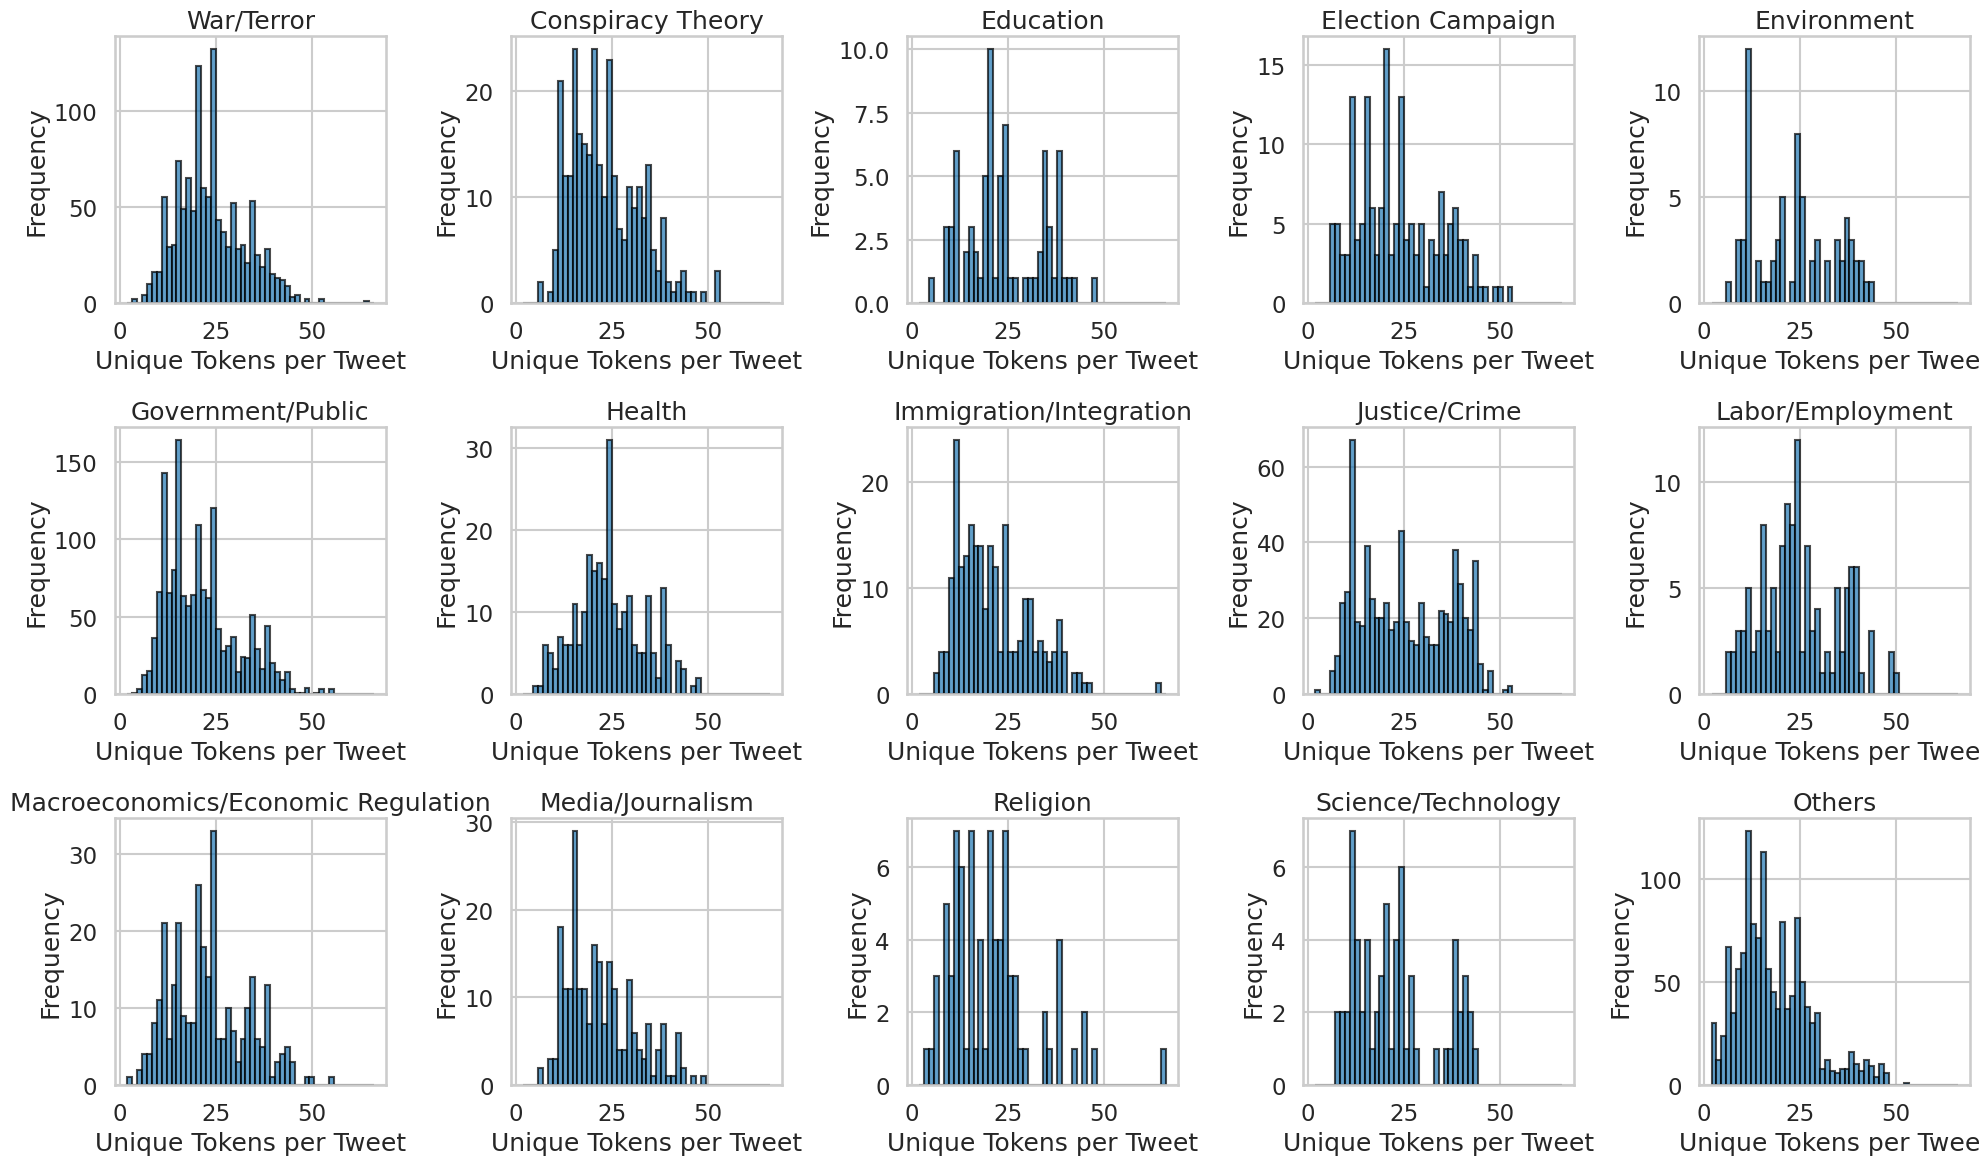

In [112]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.tokenize import TweetTokenizer

# Define the classes
classes = ["War/Terror", "Conspiracy Theory", "Education", "Election Campaign", "Environment", 
           "Government/Public", "Health", "Immigration/Integration", 
           "Justice/Crime", "Labor/Employment", 
           "Macroeconomics/Economic Regulation", "Media/Journalism", "Religion", 
           "Science/Technology", "Others"]

# Load data
filename = f"../data/labeled_data/generic_test_{k}.json"
with open(filename) as f:
    data = json.load(f)
train_df = pd.DataFrame(data["train"])
val_df = pd.DataFrame(data["valid"])
test_df = pd.DataFrame(data["test"])

# Create histograms for each class
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))

# Initialize the TweetTokenizer
tokenizer = TweetTokenizer()

# To determine the global x-axis range, we'll first compute all unique token counts
all_unique_tokens = []

for label in classes:
    # Filter dataframes based on the current class
    train_class_df = train_df[train_df['annotations'].apply(lambda x: label in x)]
    val_class_df = val_df[val_df['annotations'].apply(lambda x: label in x)]
    test_class_df = test_df[test_df['annotations'].apply(lambda x: label in x)]
    
    # Concatenate the datasets and extract unique tokens per tweet
    dfs_all = pd.concat([train_class_df, val_class_df, test_class_df])
    dfs_all_unique_tokens = dfs_all['text'].apply(lambda x: len(set(tokenizer.tokenize(x))))
    all_unique_tokens.extend(dfs_all_unique_tokens)

# Determine global x-axis range
global_min = min(all_unique_tokens)
global_max = max(all_unique_tokens)

for idx, label in enumerate(classes):
    # Determine the row and column for the current plot
    row = idx // 5
    col = idx % 5
    
    # Filter dataframes based on the current class
    train_class_df = train_df[train_df['annotations'].apply(lambda x: label in x)]
    val_class_df = val_df[val_df['annotations'].apply(lambda x: label in x)]
    test_class_df = test_df[test_df['annotations'].apply(lambda x: label in x)]
    
    # Concatenate the datasets and extract unique tokens per tweet
    dfs_all = pd.concat([train_class_df, val_class_df, test_class_df])
    dfs_all_unique_tokens = dfs_all['text'].apply(lambda x: len(set(tokenizer.tokenize(x))))
    
    # Plot the histogram
    axes[row, col].hist(dfs_all_unique_tokens, bins=50, edgecolor='black', alpha=0.7, range=(global_min, global_max))
    axes[row, col].set_title(f"{label}")
    axes[row, col].set_ylabel("Frequency")
    axes[row, col].set_xlabel("Unique Tokens per Tweet")

plt.tight_layout()
plt.show()

In [84]:
import numpy as np

# 1. Calculate sentence lengths for "Health" class
health_df = dfs_all[dfs_all['annotations'].apply(lambda x: "Health" in x)]
health_lengths = health_df['text'].apply(len)

# 2. Bin the sentence lengths
bins = np.histogram_bin_edges(health_lengths, bins='auto')
health_binned = np.digitize(health_lengths, bins)

# 3. Identify bins with high count of tweets
bin_counts = np.bincount(health_binned)
high_count_bins = np.where(bin_counts > bin_counts.mean() + 2 * bin_counts.std())[0]  # More than 2 standard deviations from the mean

# Extract tweets from these bins
outlier_tweets = health_df.iloc[np.isin(health_binned, high_count_bins)]

print("Tweets in 'Health' Class with Similar Lengths:")
print(outlier_tweets)

Tweets in 'Health' Class with Similar Lengths:
Empty DataFrame
Columns: [id, campaign_name, text, annotations]
Index: []


In [91]:
import numpy as np

# 1. Calculate sentence lengths for "Health" class
health_df = dfs_all[dfs_all['annotations'].apply(lambda x: "Health" in x)]
health_lengths = health_df['text'].apply(len)

# 2. Bin the sentence lengths
bins = np.histogram_bin_edges(health_lengths, bins='auto')
health_binned = np.digitize(health_lengths, bins)

# 3. Identify bins with high count of tweets
bin_counts = np.bincount(health_binned)
high_count_bins = np.where(bin_counts > bin_counts.mean() + 0 * bin_counts.std())[0]  # More than 2 standard deviations from the mean

# Extract tweets from these bins
outlier_tweets = health_df.iloc[np.isin(health_binned, high_count_bins)]

print("Tweets in 'Health' Class with Similar Lengths:")
print(outlier_tweets)

Tweets in 'Health' Class with Similar Lengths:
                      id campaign_name  \
903  1168450588197249025      REA_0621   
240  1164490569219006464      REA_0621   

                                                  text       annotations  
903  Kevin Hart survived the car accident and is no...  [Health, Others]  
240  A woman from Germany has suffered a tremendous...  [Health, Others]  


KeyError: 'Label'

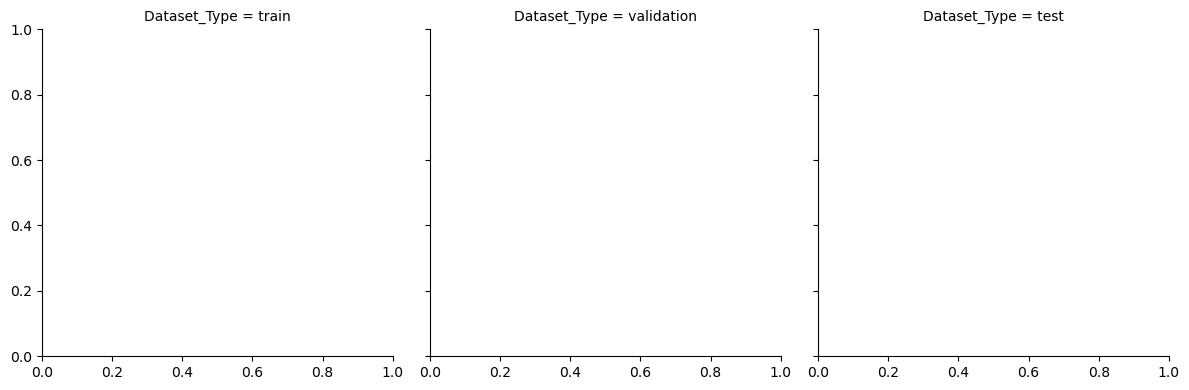

In [53]:
g = sns.FacetGrid(results_df, col="Dataset_Type", height=4, aspect=1)
g.map(sns.barplot, "Label", "TTR", order=df['Label'].unique())
plt.xticks(rotation=45)
plt.show()

In [49]:
print(results_df.groupby(['Label', 'Dataset_Type']).size())


Label              Dataset_Type
Conspiracy Theory  validation      75
Education          test            75
War/Terror         train           75
dtype: int64


In [48]:
average_results_df = results_df.groupby(['Label', 'Dataset_Type']).agg({
    'TTR': 'mean',
    'Sentence_Length_Std': 'mean',
    'Topic_Diversity': 'mean',  # Assuming you have this column in results_df
    'Entropy': 'mean'  # Assuming you have this column in results_df
}).reset_index()

print(average_results_df)

               Label Dataset_Type       TTR  Sentence_Length_Std  \
0  Conspiracy Theory   validation  0.672925            10.984890   
1          Education         test  0.648500            11.730497   
2         War/Terror        train  0.546671            11.192330   

   Topic_Diversity   Entropy  
0             10.0  5.933780  
1             10.0  6.032610  
2             10.0  6.748908  


In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re

import requests
import json
from tqdm import tqdm
from emoji import demojize
from nltk.tokenize import TweetTokenizer
import os
from datetime import datetime
import sys
import os
sys.path.append("../src")
import prompt_utils
from reproduce_model import normalizeTweet

import numpy as np

import pandas as pd
from collections import Counter

# Define a list of filenames to load

for k in range(0, 5):
    filename = f"../data/labeled_data/generic_test_{k}.json"
    with open(filename) as f:
        data = json.load(f)
    df_train = pd.DataFrame(data["train"])
    df_test = pd.DataFrame(data["test"])
    df_valid = pd.DataFrame(data["valid"])

    

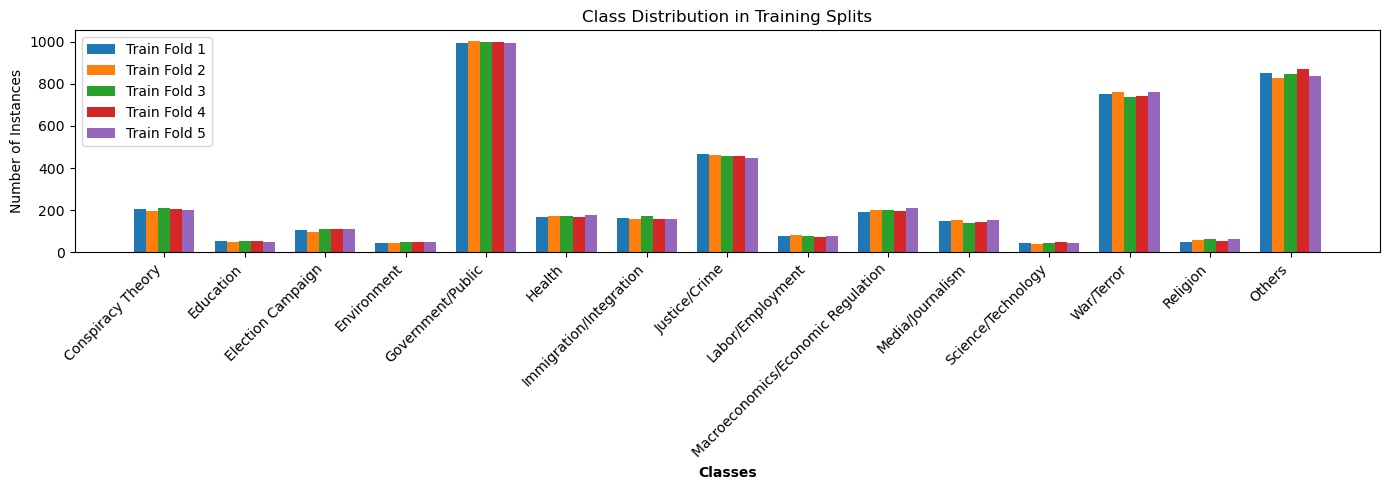

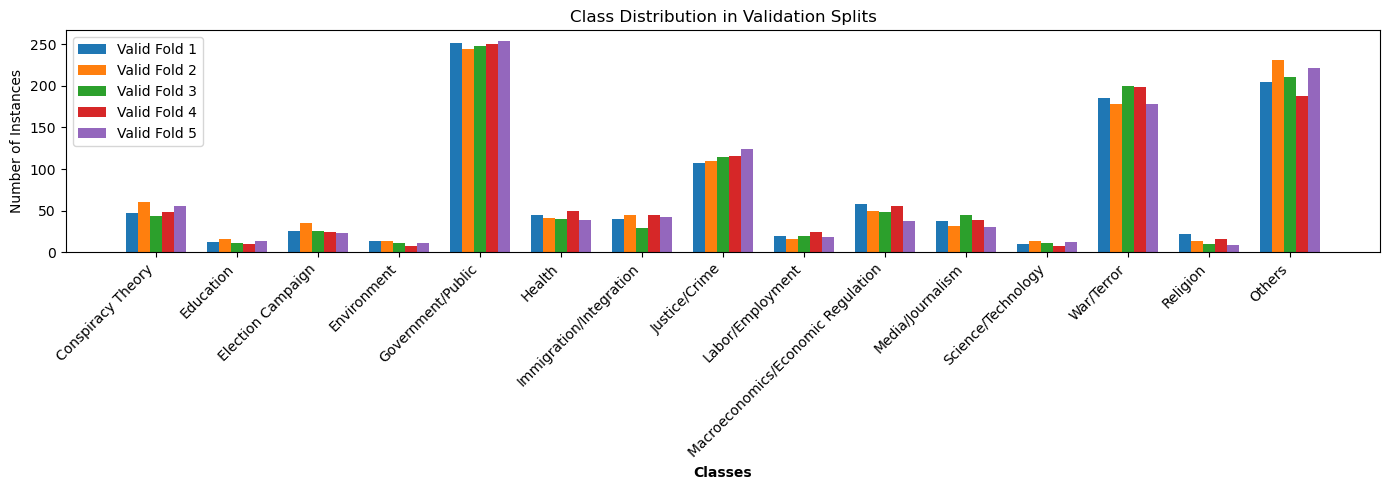

In [16]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Initialize lists to store class counts
train_counts_list = []
valid_counts_list = []

# Extract class counts for each fold
for k in range(0, 5):
    filename = f"../data/labeled_data/generic_test_{k}.json"
    with open(filename) as f:
        data = json.load(f)
    df_train = pd.DataFrame(data["train"])
    df_valid = pd.DataFrame(data["valid"])
    
    # Convert annotations to list of lists
    try:
        train_annotations = df_train["annotations"].apply(ast.literal_eval).tolist()
        valid_annotations = df_valid["annotations"].apply(ast.literal_eval).tolist()
    except:
        train_annotations = df_train["annotations"].tolist()
        valid_annotations = df_valid["annotations"].tolist()

    classes = ["Conspiracy Theory",  "Education", "Election Campaign", "Environment", 
              "Government/Public", "Health", "Immigration/Integration", 
              "Justice/Crime", "Labor/Employment", 
              "Macroeconomics/Economic Regulation", "Media/Journalism", "Science/Technology", "War/Terror", "Religion", "Others"]
    
    # Count classes for each set
    train_counts = {cls: sum([cls in annot for annot in train_annotations]) for cls in classes}
    valid_counts = {cls: sum([cls in annot for annot in valid_annotations]) for cls in classes}
    
    train_counts_list.append(train_counts)
    valid_counts_list.append(valid_counts)

barWidth = 0.15
r1 = range(len(classes))
# Plotting for Training Splits
plt.figure(figsize=(14,5))

for i in range(5):
    plt.bar([x + i*barWidth for x in r1], [train_counts_list[i].get(cls, 0) for cls in classes], width=barWidth, label=f'Train Fold {i+1}')

# Adjust x-ticks position
middle_fold = 2  # Middle fold (0-indexed) for alignment (5 folds -> middle is 2)
plt.xticks([r + middle_fold*barWidth for r in range(len(classes))], classes, rotation=45, ha='right')

plt.xlabel('Classes', fontweight='bold')
plt.ylabel('Number of Instances')  # Y-axis title
plt.title('Class Distribution in Training Splits')  # Plot title
plt.legend()
plt.tight_layout()
plt.savefig('training_class_distribution.png')
plt.show()

# Plotting for Validation Splits
plt.figure(figsize=(14,5))

for i in range(5):
    plt.bar([x + i*barWidth for x in r1], [valid_counts_list[i].get(cls, 0) for cls in classes], width=barWidth, label=f'Valid Fold {i+1}')

# Adjust x-ticks position
plt.xticks([r + middle_fold*barWidth for r in range(len(classes))], classes, rotation=45, ha='right')

plt.xlabel('Classes', fontweight='bold')
plt.ylabel('Number of Instances')  # Y-axis title
plt.title('Class Distribution in Validation Splits')  # Plot title
plt.legend()
plt.tight_layout()
plt.savefig('validation_class_distribution.png')
plt.show()

/tmp/ipykernel_4644/2040162999.py:57: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='gray_r'))


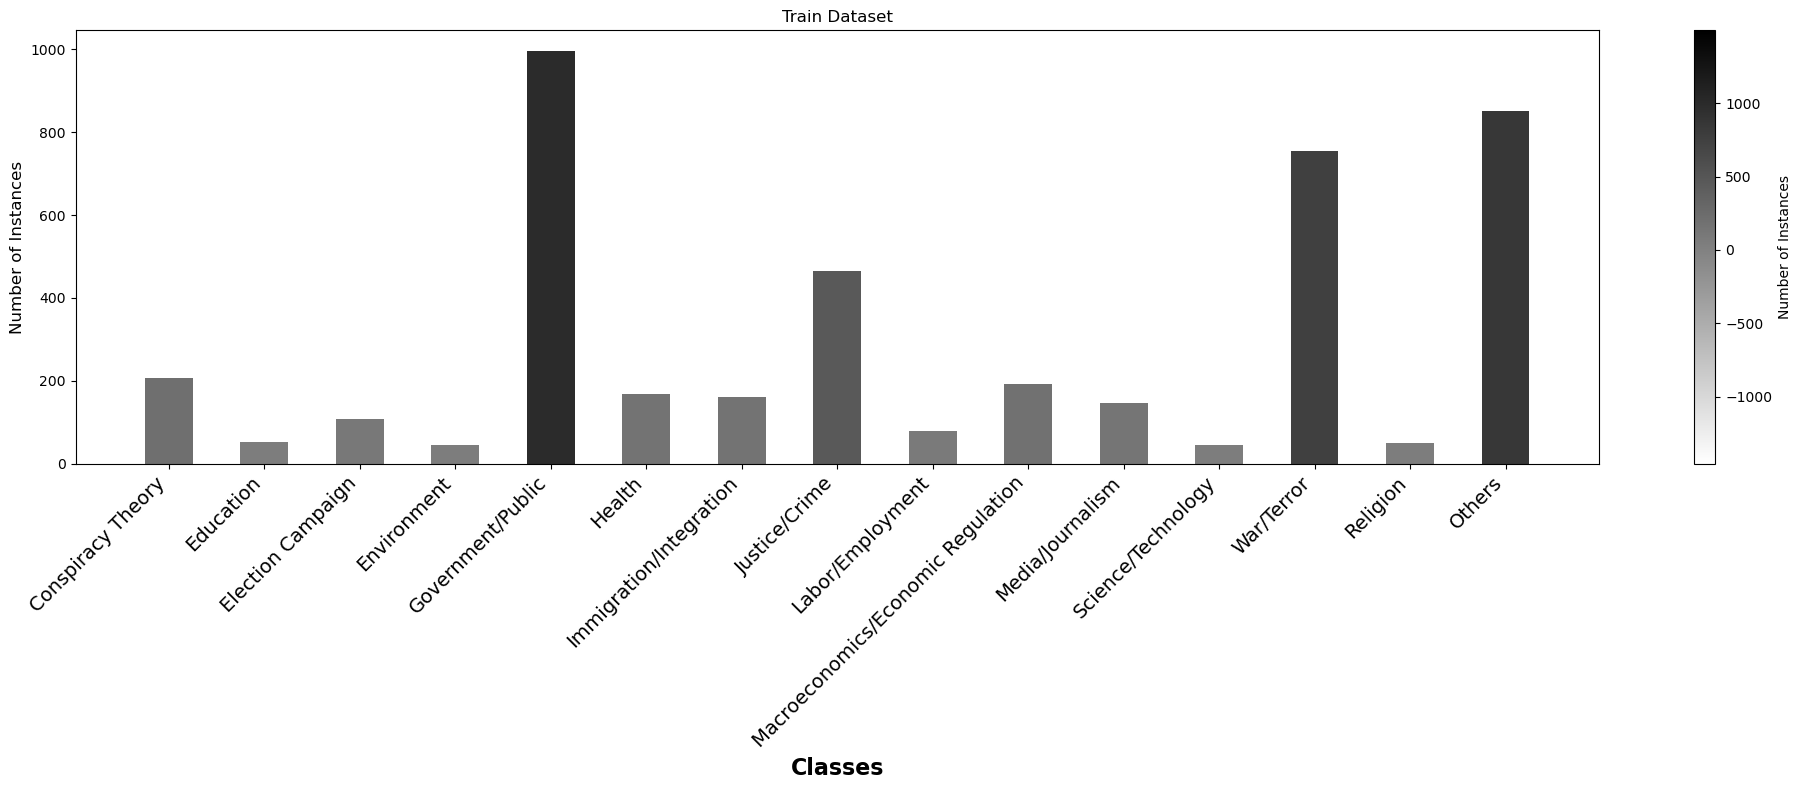

In [6]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np  # Importing numpy

# Initialize lists to store class counts
train_counts_list = []
test_counts_list = []
valid_counts_list = []

# Extract class counts for each fold
for k in range(0, 1):
    filename = f"../data/labeled_data/generic_test_{k}.json"
    with open(filename) as f:
        data = json.load(f)
    df_test= pd.DataFrame(data["train"])
    
    # Convert annotations to list of lists
    try:
        test_annotations = df_test["annotations"].apply(ast.literal_eval).tolist()
    except:
        test_annotations = df_test["annotations"].tolist()

    classes = ["Conspiracy Theory",  "Education", "Election Campaign", "Environment", 
              "Government/Public", "Health", "Immigration/Integration", 
              "Justice/Crime", "Labor/Employment", 
              "Macroeconomics/Economic Regulation", "Media/Journalism", "Science/Technology", "War/Terror", "Religion", "Others"]
    
    # Count classes for each set
    test_counts = {cls: sum([cls in annot for annot in test_annotations]) for cls in classes}
    
    test_counts_list.append(test_counts)

barWidth = 0.50
r1 = range(len(classes))

# Plotting for Training Splits
plt.figure(figsize=(20,8))

# Extracting the values and normalizing them for color mapping
values = [test_counts_list[0].get(cls, 0) for cls in classes]
norm = plt.Normalize(min(values)-1500, max(values)+500)
colors = plt.cm.gray_r(norm(values))  # Using the reversed gray colormap

plt.bar([x for x in r1], values, width=barWidth, color=colors)

# Adjust x-ticks position
middle_fold = 2  # Middle fold (0-indexed) for alignment (5 folds -> middle is 2)
plt.xticks([r for r in range(len(classes))], classes, rotation=45, ha='right', fontsize=14)

plt.xlabel('Classes', fontweight='bold', fontsize=16)
plt.ylabel('Number of Instances', fontsize=12)  # Y-axis title
plt.title('Train Dataset')  # Plot title

# Adding a colorbar to indicate the range
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='gray_r'))
cbar.set_label('Number of Instances')

plt.tight_layout()
plt.show()

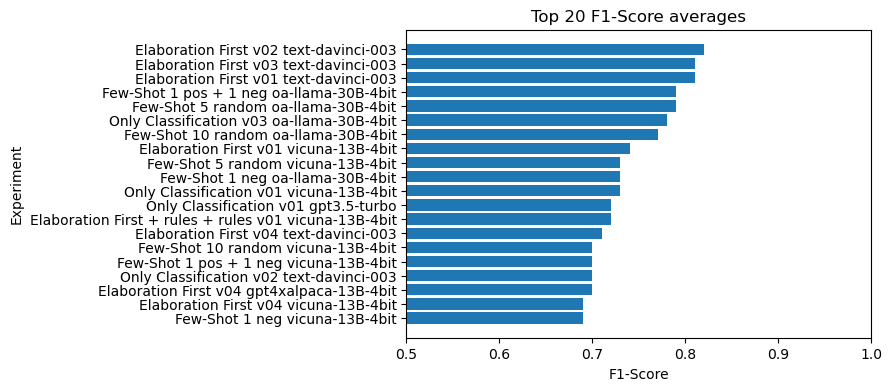

In [21]:
import pandas as pd

data = {
    'Experiment': ['Only Classification', 'Only Classification', 'Only Classification', 'Only Classification + rules', 'Few-Shot', 'Few-Shot', 'Few-Shot', 'Few-Shot', 'Few-Shot', 'Few-Shot', 'Few-Shot', 'Few-Shot', 'Elaboration First', 'Elaboration First', 'Elaboration First', 'Elaboration First', 'Elaboration First + rules', 'LoRA', 'BERTweet'],
    'Version': ['v01', 'v02', 'v03', '+ rules v01', '1 pos', '1 neg', '1 pos + 1 neg', '1 random', '3 random', '3 random v02', '5 random', '10 random', 'v01', 'v02', 'v03', 'v04', '+ rules v01', 'v01 128 rank', 'v01 128 rank'],
    'vicuna-13B-4bit': [0.73, 0.65, 0.57, 0.58, 0.37, 0.69, 0.70, 0.58, 0.46, 0.36, 0.73, 0.70, 0.74, 0.59, 0.66, 0.69, 0.72, 0.31, 0.47],
    'oa-llama-30B-4bit': [0.63, 0.63, 0.78, 0.61, 0.13, 0.73, 0.79, 0.56, 0.56, None, 0.79, 0.77, 0.67, 0.54, None, 0.55, None, None, None],
    'text-davinci-003': [0.41, 0.70, 0.59, 0.59, 0.48, 0.66, None, None, 0.62, None, None, None, 0.81, 0.82, 0.81, 0.71, 0.58, None, None],
    'gpt3.5-turbo': [0.72, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None],
    'gpt4xalpaca-13B-4bit': [0.67, 0.07, 0.68, None, None, None, None, None, None, None, None, None, 0.35, None, None, 0.70, None, None, None]
}

df = pd.DataFrame(data)
import matplotlib.pyplot as plt

# Melt the dataframe to long format
df_melted = df.melt(id_vars=['Experiment', 'Version'], value_vars=['vicuna-13B-4bit', 'oa-llama-30B-4bit', 'text-davinci-003', 'gpt3.5-turbo', 'gpt4xalpaca-13B-4bit'], var_name='Model', value_name='F1-Score')

# Sort by F1-Score and take top 20
df_sorted = df_melted.sort_values(by='F1-Score', ascending=False).head(20)

# Plot
plt.figure(figsize=(6,4))
plt.barh(df_sorted['Experiment'] + ' ' + df_sorted['Version'] + ' ' + df_sorted['Model'], df_sorted['F1-Score'])
plt.xlabel('F1-Score')
plt.ylabel('Experiment')
plt.xlim(0.5, 1) 
plt.title('Top 20 F1-Score averages')
plt.gca().invert_yaxis()  # Highest scores at the top
plt.show()


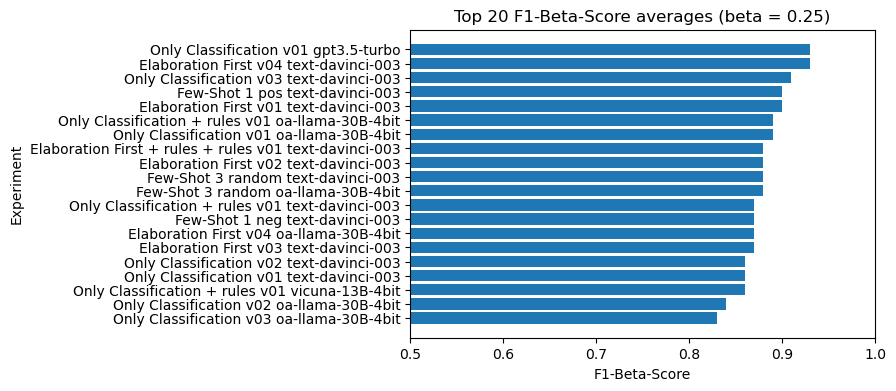

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the DataFrame from the table
data = {
    'Experiment': ['Only Classification', 'Only Classification', 'Only Classification', 'Only Classification', 'Few-Shot', 'Few-Shot', 'Few-Shot', 'Few-Shot', 'Few-Shot', 'Few-Shot', 'Few-Shot', 'Few-Shot', 'Elaboration First', 'Elaboration First', 'Elaboration First', 'Elaboration First', 'Elaboration First + rules', 'LoRA', 'BERTweet'],
    'Version': ['v01', 'v02', 'v03', '+ rules v01', '1 pos', '1 neg', '1 pos + 1 neg', '1 random', '3 random', '3 random v02', '5 random', '10 random', 'v01', 'v02', 'v03', 'v04', '+ rules v01', 'v01 128 rank', 'v01 128 rank'],
    'vicuna-13B-4bit': [0.71, 0.55, 0.56, 0.86, 0.71, 0.55, 0.57, 0.55, 0.80, 0.69, 0.69, 0.63, 0.68, 0.74, 0.63, 0.74, 0.69, 0.31, 0.47],
    'oa-llama-30B-4bit': [0.89, 0.84, 0.83, 0.89, 0.62, 0.63, 0.77, 0.65, 0.88, None, 0.71, 0.75, 0.51, 0.42, None, 0.87, None, None, None],
    'text-davinci-003': [0.86, 0.86, 0.91, 0.87, 0.90, 0.87, None, None, 0.88, None, None, None, 0.90, 0.88, 0.87, 0.93, 0.88, None, None],
    'gpt3.5-turbo': [0.93, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None],
    'gpt4xalpaca-13B-4bit': [0.61, 0.15, 0.54, None, None, None, None, None, None, None, None, None, 0.28, None, None, 0.67, None, None, None]
}

df = pd.DataFrame(data)

# Melt the dataframe to long format
df_melted = df.melt(id_vars=['Experiment', 'Version'], value_vars=['vicuna-13B-4bit', 'oa-llama-30B-4bit', 'text-davinci-003', 'gpt3.5-turbo', 'gpt4xalpaca-13B-4bit'], var_name='Model', value_name='F1-Beta-Score')

# Sort by F1-Beta-Score and take top 20
df_sorted = df_melted.sort_values(by='F1-Beta-Score', ascending=False).head(20)

# Plot
plt.figure(figsize=(6, 4))
plt.barh(df_sorted['Experiment'] + ' ' + df_sorted['Version'] + ' ' + df_sorted['Model'], df_sorted['F1-Beta-Score'])
plt.xlabel('F1-Beta-Score')
plt.ylabel('Experiment')
plt.xlim(0.5, 1)
plt.title('Top 20 F1-Beta-Score averages (beta = 0.25)')
plt.gca().invert_yaxis()  # Highest scores at the top
plt.show()


In [61]:
def calculate_fbeta_score(beta, precision, recall):
    return (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

print(calculate_fbeta_score(0.25, 0.540961, 0.413333))
print(calculate_fbeta_score(0.25, 0.500952, 0.569231))
print(calculate_fbeta_score(0.25, 0.722828, 0.514286))
print(calculate_fbeta_score(0.25, 0.625748, 0.557143))
print(calculate_fbeta_score(0.25, 0.602222, 0.381818))
print(calculate_fbeta_score(0.25, 0.566496, 0.672727))

0.5313105972125253
0.504511762165083
0.7059881839470099
0.6212480755196312
0.5824446185814692
0.5718074524898571


In [62]:
import numpy as np

np.mean([0.5313105972125253,
0.504511762165083,
0.7059881839470099,
0.6212480755196312,
0.5824446185814692,
0.5718074524898571])

0.5862184483192626

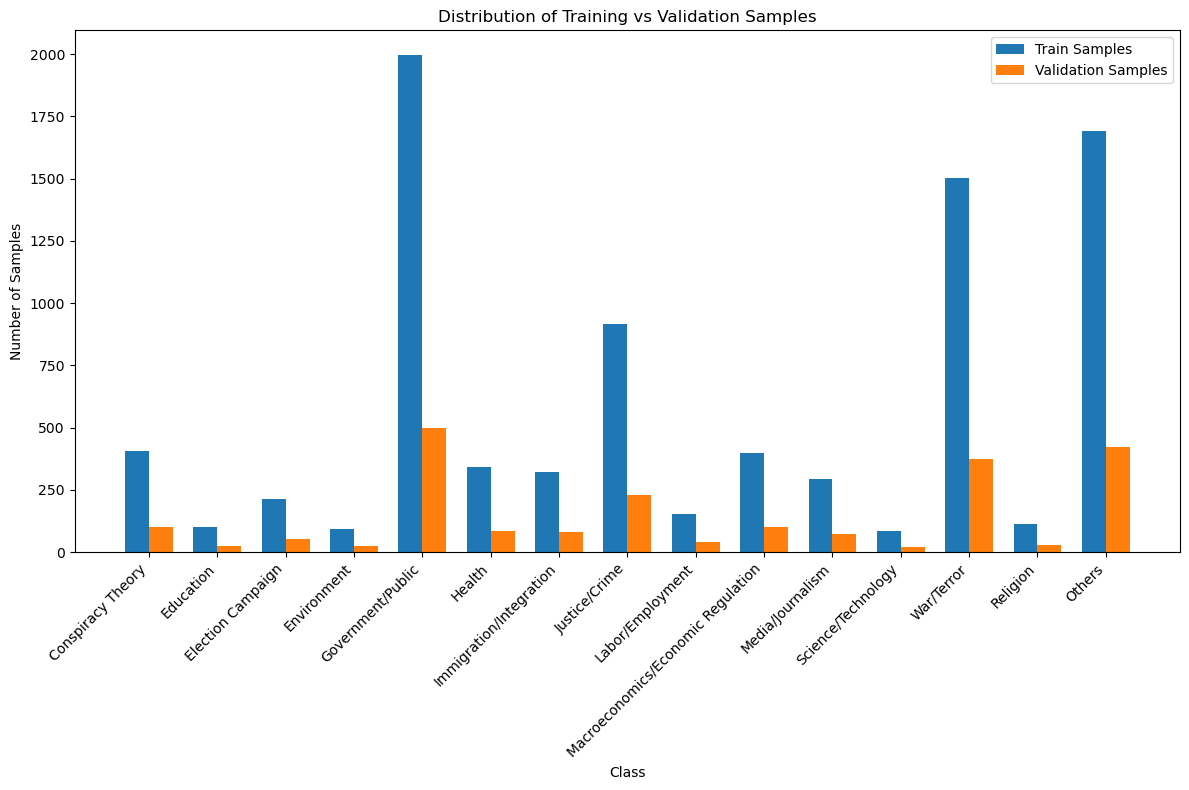

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Data
classes = ["Conspiracy Theory", "Education", "Election Campaign", "Environment", "Government/Public", "Health", 
           "Immigration/Integration", "Justice/Crime", "Labor/Employment", "Macroeconomics/Economic Regulation", 
           "Media/Journalism", "Science/Technology", "War/Terror", "Religion", "Others"]

train_samples = [406, 100, 212, 92, 1996, 342, 321, 915, 155, 400, 294, 86, 1502, 113, 1691]
validation_samples = [102, 26, 54, 24, 500, 86, 81, 229, 39, 100, 74, 22, 376, 29, 423]

# Bar Plot
bar_width = 0.35
index = np.arange(len(classes))

fig, ax = plt.subplots(figsize=(12, 8))
bar1 = ax.bar(index, train_samples, bar_width, label='Train Samples')
bar2 = ax.bar(index + bar_width, validation_samples, bar_width, label='Validation Samples')

# Labeling, Title and Axes Ticks
ax.set_xlabel('Class')
ax.set_ylabel('Number of Samples')
ax.set_title('Distribution of Training vs Validation Samples')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(classes, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


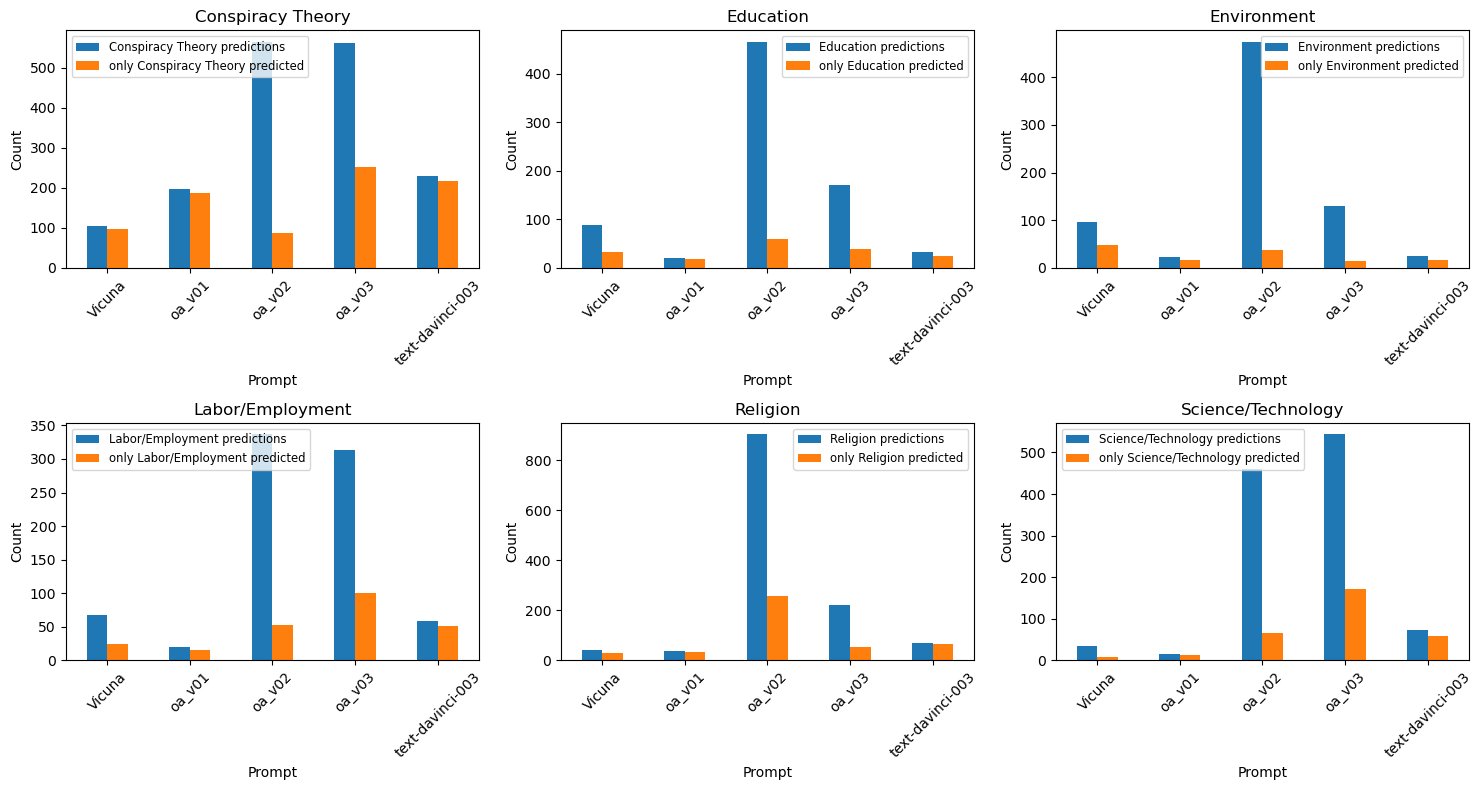

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    'Prompt': ['Vicuna',  'oa_v01', 'oa_v02','oa_v03', 'text-davinci-003'],
    'Conspiracy Theory predictions': [105, 196, 565, 561, 229],
    'only Conspiracy Theory predicted': [97, 188, 87,251,  218],
    'Education predictions': [89,  21, 466, 171, 32],
    'only Education predicted': [32, 18, 60,38,  24],
    'Environment predictions': [96,  22, 475,130, 25],
    'only Environment predicted': [48,  16, 37, 14,16],
    'Labor/Employment predictions': [68,  20, 337,314, 59],
    'only Labor/Employment predicted': [25,  16, 53,100, 51],
    'Religion predictions': [40,  39, 904,221, 71],
    'only Religion predicted': [31,  35, 259,53, 64],
    'Science/Technology predictions': [34,  16, 461,544, 74],
    'only Science/Technology predicted': [8,  12, 67,171, 59]
}

df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(15, 8))

categories = ['Conspiracy Theory', 'Education', 'Environment', 'Labor/Employment', 'Religion', 'Science/Technology']

for index, category in enumerate(categories, 1):
    plt.subplot(2, 3, index)
    df.plot(x='Prompt', y=[f'{category} predictions', f'only {category} predicted'], kind='bar', ax=plt.gca())
    plt.title(category)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(fontsize='small') # Adjusted font size here


plt.tight_layout()
plt.show()


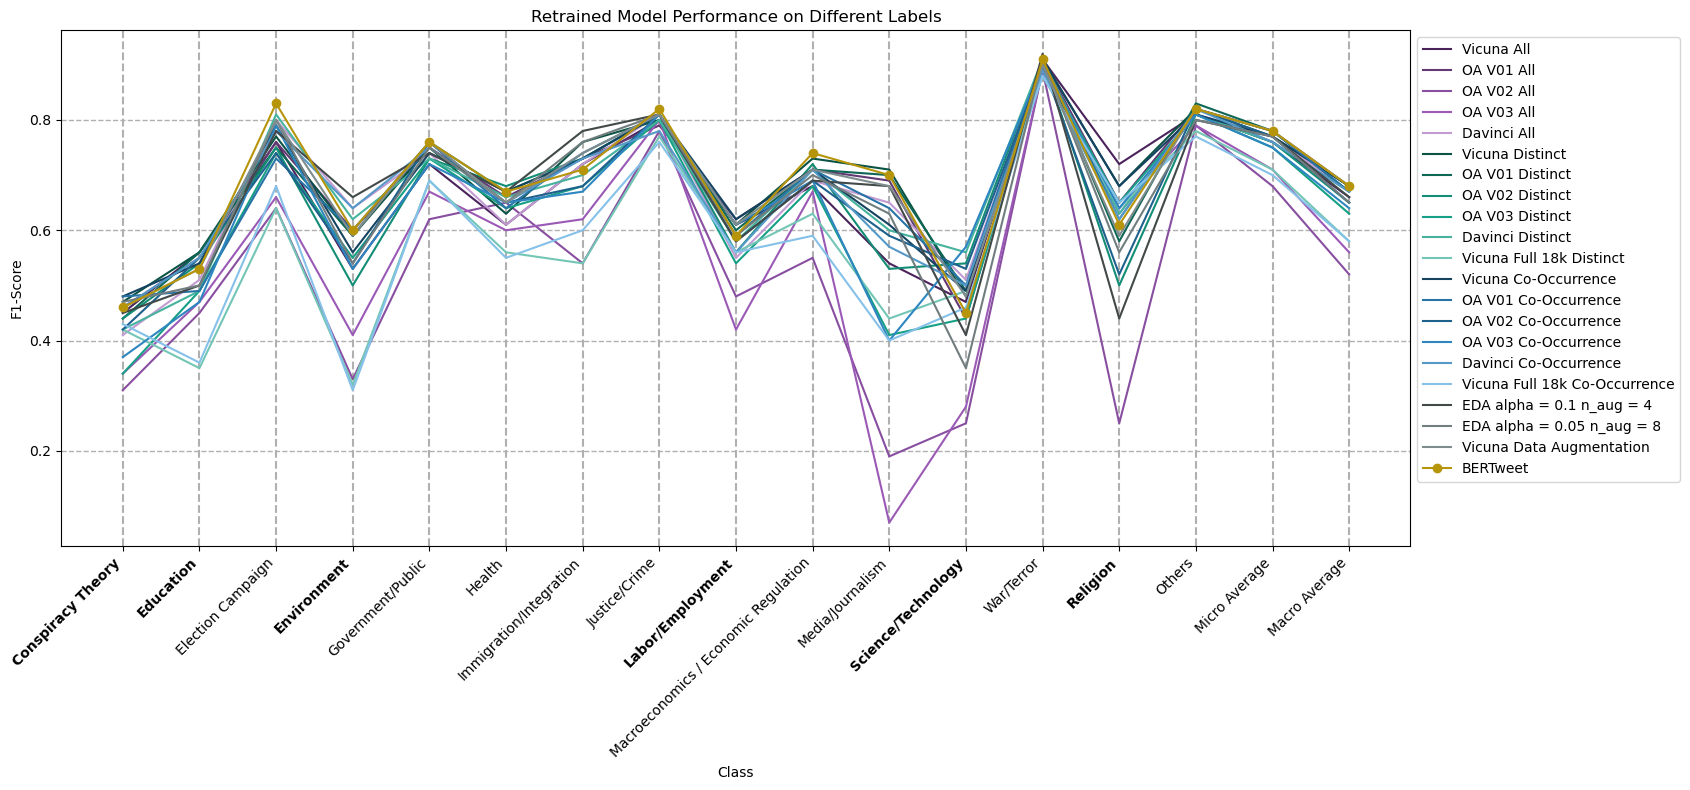

In [43]:
import matplotlib.pyplot as plt

# Data from your table
labels = ['Conspiracy Theory', 'Education', 'Election Campaign', 'Environment', 'Government/Public', 'Health', 
         'Immigration/Integration', 'Justice/Crime', 'Labor/Employment', 'Macroeconomics / Economic Regulation', 
         'Media/Journalism', 'Science/Technology', 'War/Terror', 'Religion', 'Others', 'Micro Average', 'Macro Average']

BERTweet = [0.46, 0.53, 0.83, 0.60, 0.76, 0.67, 0.71, 0.82, 0.59, 0.74, 0.70, 0.45, 0.91, 0.61, 0.82, 0.78, 0.68]
Vicuna_All = [0.45, .56, .76, .53, .72, .61, .72, .80, .61, .68, .54, .47, .91, .72, .81, .76, .66]
Vicuna_Distinct = [.47, .56, .77, .59, .75, .63, .76, .80, .61, .73, .71, .48, .91, .68, .82, .77, .68]
OA_V01_ALL = [.46, .55, .76, .6, .75, .66, .73, .79, .62, .71, .69, .44, .91, .65, .82, .78, .68]
OA_V01_Distinct = [.44, .56, .75, .59, .76, .67, .73, .81, .60, .71, .70, .49, .91, .58, .83, .78, .67]
OA_V02_ALL = [.31, .45, .64, .33, .62, .65, .54, .78, .48, .55, .19, .25, .89, .25, .79, .68, .52]
OA_V02_Distinct = [.44, .54, .75, .50, .73, .68, .73, .81, .56, .72, .53, .54, .91, .50, .81, .76, .65]
OA_V03_ALL = [.34, .47, .66, .41, .67, .60, .62, .8, .42, .67, .07, .28, .89, .64, .79, .71, .56]
OA_V03_Distinct = [.34, .49, .74, .55, .73, .64, .68, .80, .54, .68, .41, .44, .90, .65, .81, .75, .63]
DAVINCI_ALL = [.41, .51, .80, .64, .74, .61, .72, .81, .55, .69, .65, .51, .90, .63, .81, .77, .67]
DAVINCI_Distinct = [.42, .49, .81, .62, .73, .66, .70, .80, .58, .71, .60, .56, .91, .63, .81, .76, .67]
Vicuna_Co_Occurrence = [0.48, 0.54, 0.79, 0.56, 0.74, 0.67, 0.73, 0.81, 0.62, 0.71, 0.61, 0.49, 0.91, 0.68, 0.81, 0.77, 0.68]
OA_V01_Co_Occurrence = [0.48, 0.49, 0.73, 0.60, 0.76, 0.64, 0.74, 0.81, 0.59, 0.71, 0.64, 0.50, 0.91, 0.62, 0.82, 0.78, 0.67]
OA_V02_Co_Occurrence = [0.42, 0.55, 0.74, 0.54, 0.76, 0.65, 0.68, 0.81, 0.58, 0.69, 0.59, 0.53, 0.90, 0.52, 0.82, 0.77, 0.65]
OA_V03_Co_Occurrence = [0.37, 0.47, 0.79, 0.53, 0.72, 0.65, 0.67, 0.81, 0.61, 0.69, 0.40, 0.57, 0.90, 0.64, 0.81, 0.75, 0.64]
DAVINCI_Co_Occurrence = [.46, .55, .78, .64, .75, .65, .73, .78, .56, .71, .57, .5, .89, .62, .82, .76, .67]
EDA_Vicuna = [.46, .53, .80, .59, .76, .65, .74, .81, .61, .71, .68, .48, .90, .59, .82, .78, .68]
EDA_01_4 = [.45, .50, .78, .66, .74, .67, .78, .81, .58, .69, .68, .41, .92, .44, .80, .77, .66]
EDA_005_8 = [.47, .5, .8, .54, .75, .65, .76, .81, .59, .70, .63, .35, .91, .56, .8, .77, .65]
Vicuna_Distinct_Full_18k = [.42, .35, .64, .32, .69, .56, .54, .77, .56, .63, .44, .49, .88, .64, .78, .71, .58]
Vicuna_Co_Occurrence_Full_18k = [.43, .36, .68, .31, .69, .55, .60, .76, .56, .59, .40, .46, .88, .65, .77, .70, .58]
# ... include other models' data here in the same format ...

# Plotting the data
# Color map
color_map = {
    'ALL': ['#4a235a', '#633974', '#884ea0', '#9b59b6', '#c39bd3'],  # shades of blue
    'Distinct': ['#0b5345', '#0e6655', '#138d75', '#16a085', '#45b39d', '#73c6b6'],  # shades of green
    'Co-Occurrence': ['#154360', '#2874a6', '#1f618d', '#2e86c1', '#5499c7', '#85c1e9'],  # shades of red
    'EDA': ['#424949', '#717d7e', '#7f8c8d'],  # shades of purple
    'BERTweet': '#b7950b'
}

plt.figure(figsize=(20, 8))

# Plotting the data
# When plotting, use the color_map to determine the color based on the model type
plt.plot(labels, Vicuna_All, label='Vicuna All', color=color_map['ALL'][0])
plt.plot(labels, OA_V01_ALL, label='OA V01 All', color=color_map['ALL'][1])
plt.plot(labels, OA_V02_ALL, label='OA V02 All', color=color_map['ALL'][2])
plt.plot(labels, OA_V03_ALL, label='OA V03 All', color=color_map['ALL'][3])
plt.plot(labels, DAVINCI_ALL, label='Davinci All', color=color_map['ALL'][4])

plt.plot(labels, Vicuna_Distinct, label='Vicuna Distinct', color=color_map['Distinct'][0])
plt.plot(labels, OA_V01_Distinct, label='OA V01 Distinct', color=color_map['Distinct'][1])
plt.plot(labels, OA_V02_Distinct, label='OA V02 Distinct', color=color_map['Distinct'][2])
plt.plot(labels, OA_V03_Distinct, label='OA V03 Distinct', color=color_map['Distinct'][3])
plt.plot(labels, DAVINCI_Distinct, label='Davinci Distinct', color=color_map['Distinct'][4])
plt.plot(labels, Vicuna_Distinct_Full_18k, label='Vicuna Full 18k Distinct', color=color_map['Distinct'][5])

plt.plot(labels, Vicuna_Co_Occurrence, label='Vicuna Co-Occurrence', color=color_map['Co-Occurrence'][0])
plt.plot(labels, OA_V01_Co_Occurrence, label='OA V01 Co-Occurrence', color=color_map['Co-Occurrence'][1])
plt.plot(labels, OA_V02_Co_Occurrence, label='OA V02 Co-Occurrence', color=color_map['Co-Occurrence'][2])
plt.plot(labels, OA_V03_Co_Occurrence, label='OA V03 Co-Occurrence', color=color_map['Co-Occurrence'][3])
plt.plot(labels, DAVINCI_Co_Occurrence, label='Davinci Co-Occurrence', color=color_map['Co-Occurrence'][4])
plt.plot(labels, Vicuna_Co_Occurrence_Full_18k, label='Vicuna Full 18k Co-Occurrence', color=color_map['Co-Occurrence'][5])

plt.plot(labels, EDA_01_4, label='EDA alpha = 0.1 n_aug = 4', color=color_map['EDA'][0])
plt.plot(labels, EDA_005_8, label='EDA alpha = 0.05 n_aug = 8', color=color_map['EDA'][1])
plt.plot(labels, EDA_Vicuna, label='Vicuna Data Augmentation', color=color_map['EDA'][2])

plt.plot(labels, BERTweet, marker='o', label='BERTweet', color=color_map['BERTweet'])


# Setting labels, title, legend, etc.
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.title('Retrained Model Performance on Different Labels')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.grid(True, axis='both', linestyle='--', linewidth=1)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.85, 1])


ax = plt.gca()

# Making the vertical grid lines thicker
ax.xaxis.grid(True, linestyle='--', linewidth=1.5)

# Making specific labels bold
bold_labels = ['Conspiracy Theory', 'Education', 'Environment', 'Labor/Employment', 'Science/Technology', 'Religion']
for label in ax.get_xticklabels():
    if label.get_text() in bold_labels:
        label.set_weight('bold')

plt.show()


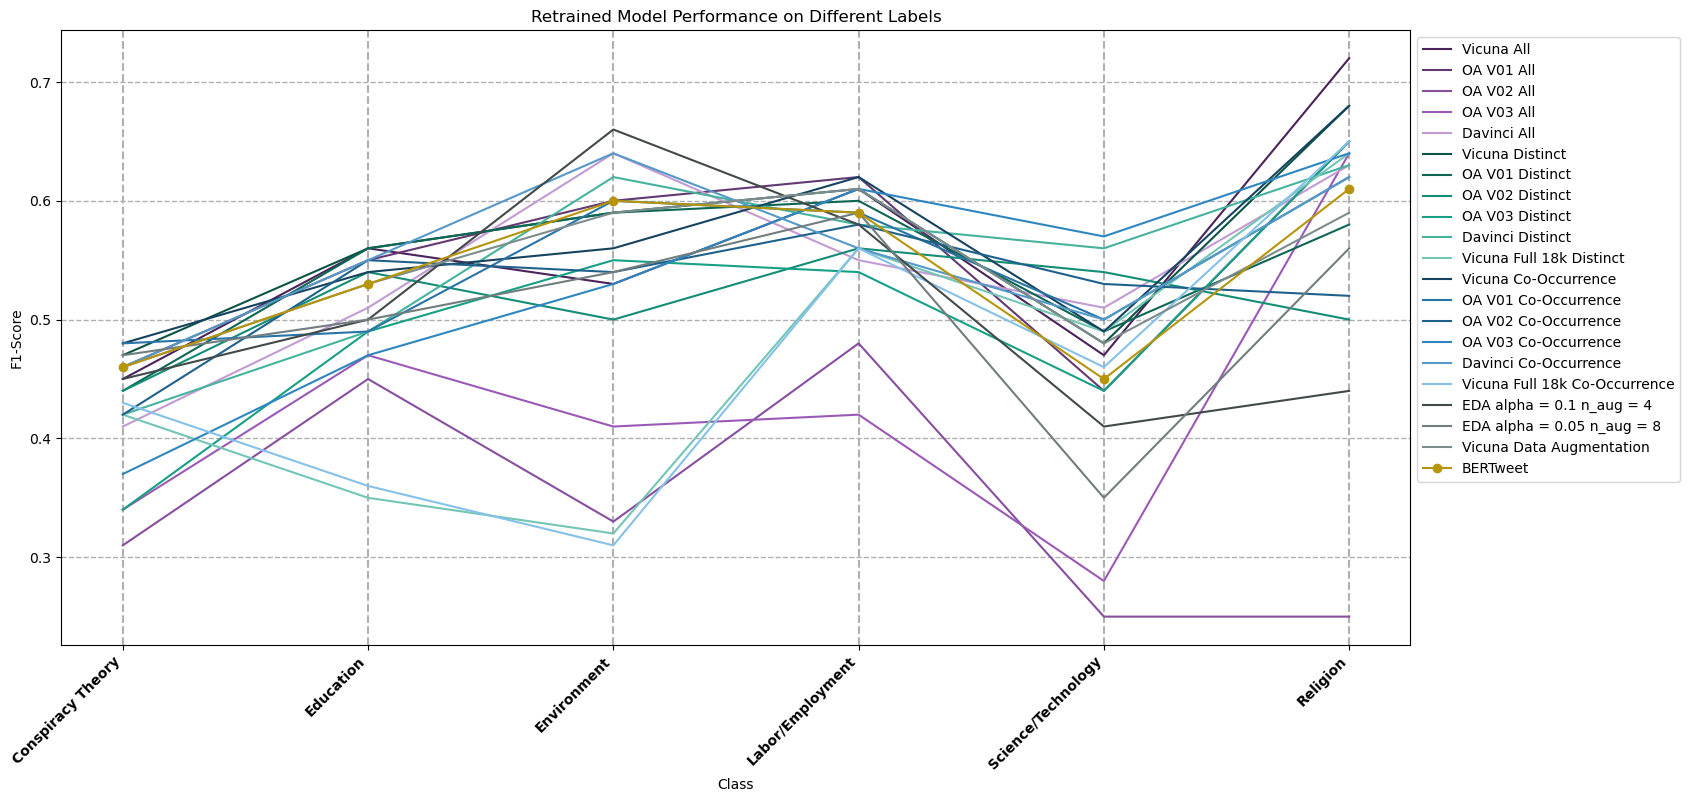

In [11]:
import matplotlib.pyplot as plt

# Data from your table
labels = ['Conspiracy Theory', 'Education', 'Environment', 'Labor/Employment', 'Science/Technology', 'Religion']

BERTweet = [0.46, 0.53, 0.60, 0.59, 0.45, 0.61]
Vicuna_All = [0.45, .56,  .53, .61, .47, .72]
Vicuna_Distinct = [.47, .56,  .59, .61, .48, .68]
OA_V01_ALL = [.46, .55,  .6, .62, .44, .65]
OA_V01_Distinct = [.44, .56,  .59, .60, .49, .58]
OA_V02_ALL = [.31, .45,  .33, .48, .25, .25]
OA_V02_Distinct = [.44, .54,  .50, .56, .54, .50]
OA_V03_ALL = [.34, .47,  .41, .42, .28, .64]
OA_V03_Distinct = [.34, .49,  .55, .54, .44, .65]
DAVINCI_ALL = [.41, .51,  .64, .55, .51, .63]
DAVINCI_Distinct = [.42, .49,  .62, .58, .56, .63]
Vicuna_Co_Occurrence = [0.48, 0.54, 0.56, 0.62, 0.49, 0.68]
OA_V01_Co_Occurrence = [0.48, 0.49, 0.60, 0.59, 0.50, 0.62]
OA_V02_Co_Occurrence = [0.42, 0.55, 0.54, 0.58, 0.53, 0.52]
OA_V03_Co_Occurrence = [0.37, 0.47, 0.53, 0.61, 0.57, 0.64]
DAVINCI_Co_Occurrence = [.46, .55, .64, .56, .5, .62]
EDA_Vicuna = [.46, .53,  .59, .61, .48,.59]
EDA_01_4 = [.45, .50,  .66, .58, .41, .44]
EDA_005_8 = [.47, .5, .54, .59, .35, .56]
Vicuna_Distinct_Full_18k = [.42, .35,  .32, .56, .49, .64]
Vicuna_Co_Occurrence_Full_18k = [.43, .36,  .31, .56, .46, .65]
# ... include other models' data here in the same format ...

# Plotting the data
# Color map
color_map = {
    'ALL': ['#4a235a', '#633974', '#884ea0', '#9b59b6', '#c39bd3'],  # shades of blue
    'Distinct': ['#0b5345', '#0e6655', '#138d75', '#16a085', '#45b39d', '#73c6b6'],  # shades of green
    'Co-Occurrence': ['#154360', '#2874a6', '#1f618d', '#2e86c1', '#5499c7', '#85c1e9'],  # shades of red
    'EDA': ['#424949', '#717d7e', '#7f8c8d'],  # shades of purple
    'BERTweet': '#b7950b'
}

plt.figure(figsize=(20, 8))

# Plotting the data
# When plotting, use the color_map to determine the color based on the model type
plt.plot(labels, Vicuna_All, label='Vicuna All', color=color_map['ALL'][0])
plt.plot(labels, OA_V01_ALL, label='OA V01 All', color=color_map['ALL'][1])
plt.plot(labels, OA_V02_ALL, label='OA V02 All', color=color_map['ALL'][2])
plt.plot(labels, OA_V03_ALL, label='OA V03 All', color=color_map['ALL'][3])
plt.plot(labels, DAVINCI_ALL, label='Davinci All', color=color_map['ALL'][4])

plt.plot(labels, Vicuna_Distinct, label='Vicuna Distinct', color=color_map['Distinct'][0])
plt.plot(labels, OA_V01_Distinct, label='OA V01 Distinct', color=color_map['Distinct'][1])
plt.plot(labels, OA_V02_Distinct, label='OA V02 Distinct', color=color_map['Distinct'][2])
plt.plot(labels, OA_V03_Distinct, label='OA V03 Distinct', color=color_map['Distinct'][3])
plt.plot(labels, DAVINCI_Distinct, label='Davinci Distinct', color=color_map['Distinct'][4])
plt.plot(labels, Vicuna_Distinct_Full_18k, label='Vicuna Full 18k Distinct', color=color_map['Distinct'][5])

plt.plot(labels, Vicuna_Co_Occurrence, label='Vicuna Co-Occurrence', color=color_map['Co-Occurrence'][0])
plt.plot(labels, OA_V01_Co_Occurrence, label='OA V01 Co-Occurrence', color=color_map['Co-Occurrence'][1])
plt.plot(labels, OA_V02_Co_Occurrence, label='OA V02 Co-Occurrence', color=color_map['Co-Occurrence'][2])
plt.plot(labels, OA_V03_Co_Occurrence, label='OA V03 Co-Occurrence', color=color_map['Co-Occurrence'][3])
plt.plot(labels, DAVINCI_Co_Occurrence, label='Davinci Co-Occurrence', color=color_map['Co-Occurrence'][4])
plt.plot(labels, Vicuna_Co_Occurrence_Full_18k, label='Vicuna Full 18k Co-Occurrence', color=color_map['Co-Occurrence'][5])

plt.plot(labels, EDA_01_4, label='EDA alpha = 0.1 n_aug = 4', color=color_map['EDA'][0])
plt.plot(labels, EDA_005_8, label='EDA alpha = 0.05 n_aug = 8', color=color_map['EDA'][1])
plt.plot(labels, EDA_Vicuna, label='Vicuna Data Augmentation', color=color_map['EDA'][2])

plt.plot(labels, BERTweet, marker='o', label='BERTweet', color=color_map['BERTweet'])


# Setting labels, title, legend, etc.
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.title('Retrained Model Performance on Different Labels')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.grid(True, axis='both', linestyle='--', linewidth=1)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.85, 1])


ax = plt.gca()

# Making the vertical grid lines thicker
ax.xaxis.grid(True, linestyle='--', linewidth=1.5)

# Making specific labels bold
bold_labels = ['Conspiracy Theory', 'Education', 'Environment', 'Labor/Employment', 'Science/Technology', 'Religion']
for label in ax.get_xticklabels():
    if label.get_text() in bold_labels:
        label.set_weight('bold')

plt.show()


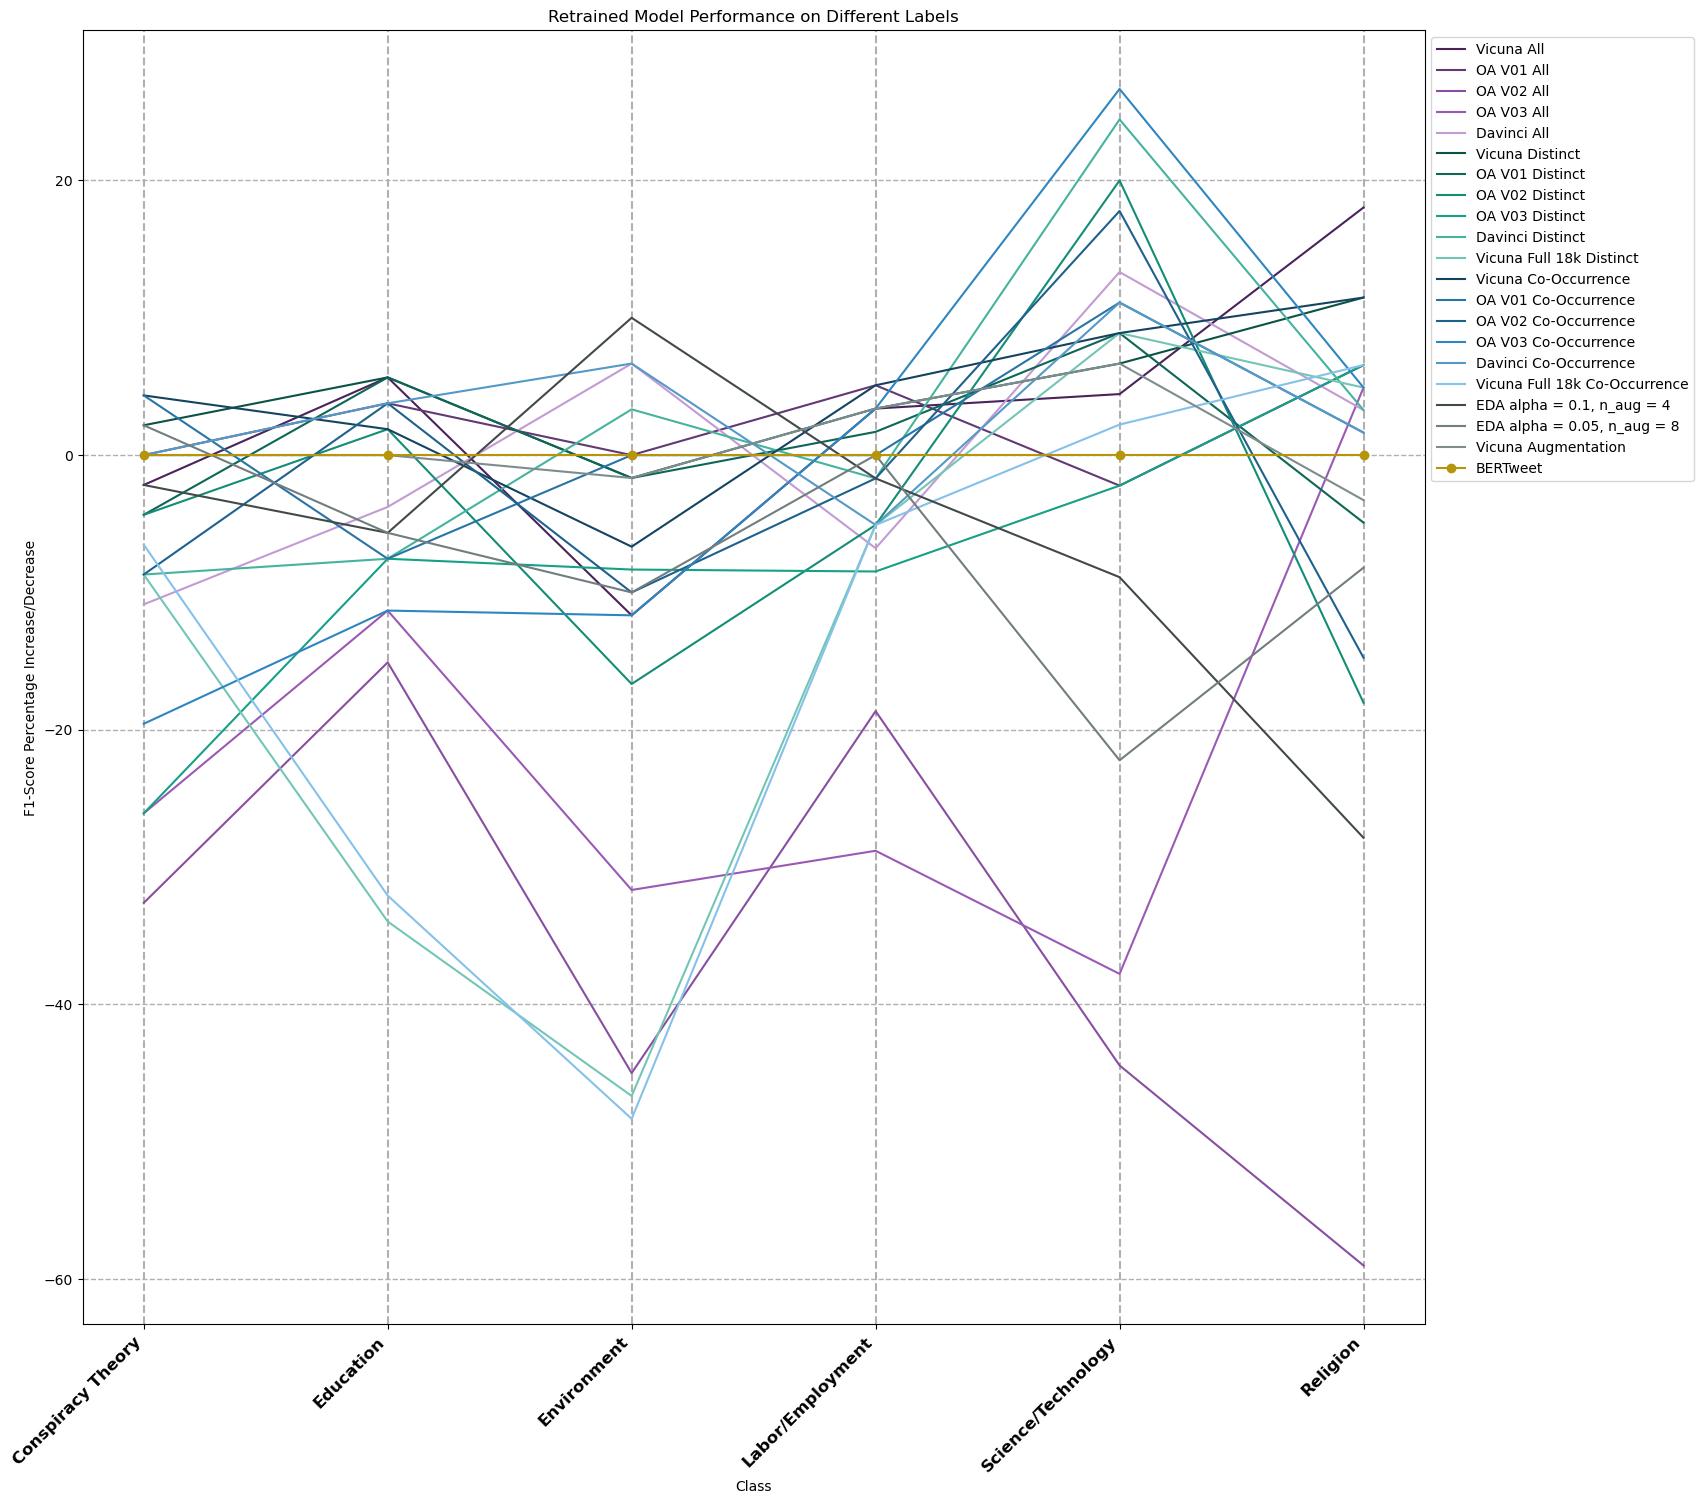

In [15]:
import matplotlib.pyplot as plt
import numpy as np
 
# ... [rest of your data] ...
 
def percent_difference_from_bertweet(data, bertweet):
    return [(val - bert) / bert * 100 for val, bert in zip(data, bertweet)]
 
# Create percentage differences for all models compared to BERTweet
Vicuna_All_diff = percent_difference_from_bertweet(Vicuna_All, BERTweet)
 
def categorize_percent_diff(percent_diff):
    return [min(100, max(-100, val)) for val in percent_diff] 
 
plt.figure(figsize=(20, 15))
 
all_models = {
    'ALL': [Vicuna_All, OA_V01_ALL, OA_V02_ALL, OA_V03_ALL, DAVINCI_ALL],
    'Distinct': [Vicuna_Distinct, OA_V01_Distinct, OA_V02_Distinct, OA_V03_Distinct, DAVINCI_Distinct, Vicuna_Distinct_Full_18k],
    'Co-Occurrence': [Vicuna_Co_Occurrence, OA_V01_Co_Occurrence, OA_V02_Co_Occurrence, OA_V03_Co_Occurrence, DAVINCI_Co_Occurrence, Vicuna_Co_Occurrence_Full_18k],
    'EDA': [EDA_01_4, EDA_005_8, EDA_Vicuna]
}
 
all_models_name = {
    'ALL': ["Vicuna All", "OA V01 All", "OA V02 All", "OA V03 All", "Davinci All"],
    'Distinct': ["Vicuna Distinct", "OA V01 Distinct", "OA V02 Distinct", "OA V03 Distinct", "Davinci Distinct", "Vicuna Full 18k Distinct"],
    'Co-Occurrence': ["Vicuna Co-Occurrence", "OA V01 Co-Occurrence", "OA V02 Co-Occurrence", "OA V03 Co-Occurrence", "Davinci Co-Occurrence",  "Vicuna Full 18k Co-Occurrence"],
    'EDA': ["EDA alpha = 0.1, n_aug = 4", "EDA alpha = 0.05, n_aug = 8", "Vicuna Augmentation"],
}
 
# Plotting the data:
 
# Loop over categories and their respective models
for category, models in all_models.items():
    for i, model in enumerate(models):
        model_diff = percent_difference_from_bertweet(model, BERTweet)
        model_cat = categorize_percent_diff(model_diff)
        plt.plot(labels, model_cat, label=f'{all_models_name[category][i]}', color=color_map[category][i])
 
plt.plot(labels, [0]*6, marker='o', label='BERTweet', color=color_map['BERTweet'])
 
# Setting labels, title, legend, etc.
plt.xlabel('Class')
plt.ylabel('F1-Score Percentage Increase/Decrease')
plt.title('Retrained Model Performance on Different Labels')
plt.legend()
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
#plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.grid(True, axis='both', linestyle='--', linewidth=1)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.85, 1])
 
 
ax = plt.gca()
 
# Making the vertical grid lines thicker
ax.xaxis.grid(True, linestyle='--', linewidth=1.5)
 
# Making specific labels bold
bold_labels = ['Conspiracy Theory', 'Education', 'Environment', 'Labor/Employment', 'Science/Technology', 'Religion']
for label in ax.get_xticklabels():
    if label.get_text() in bold_labels:
        label.set_weight('bold')
 
plt.show()

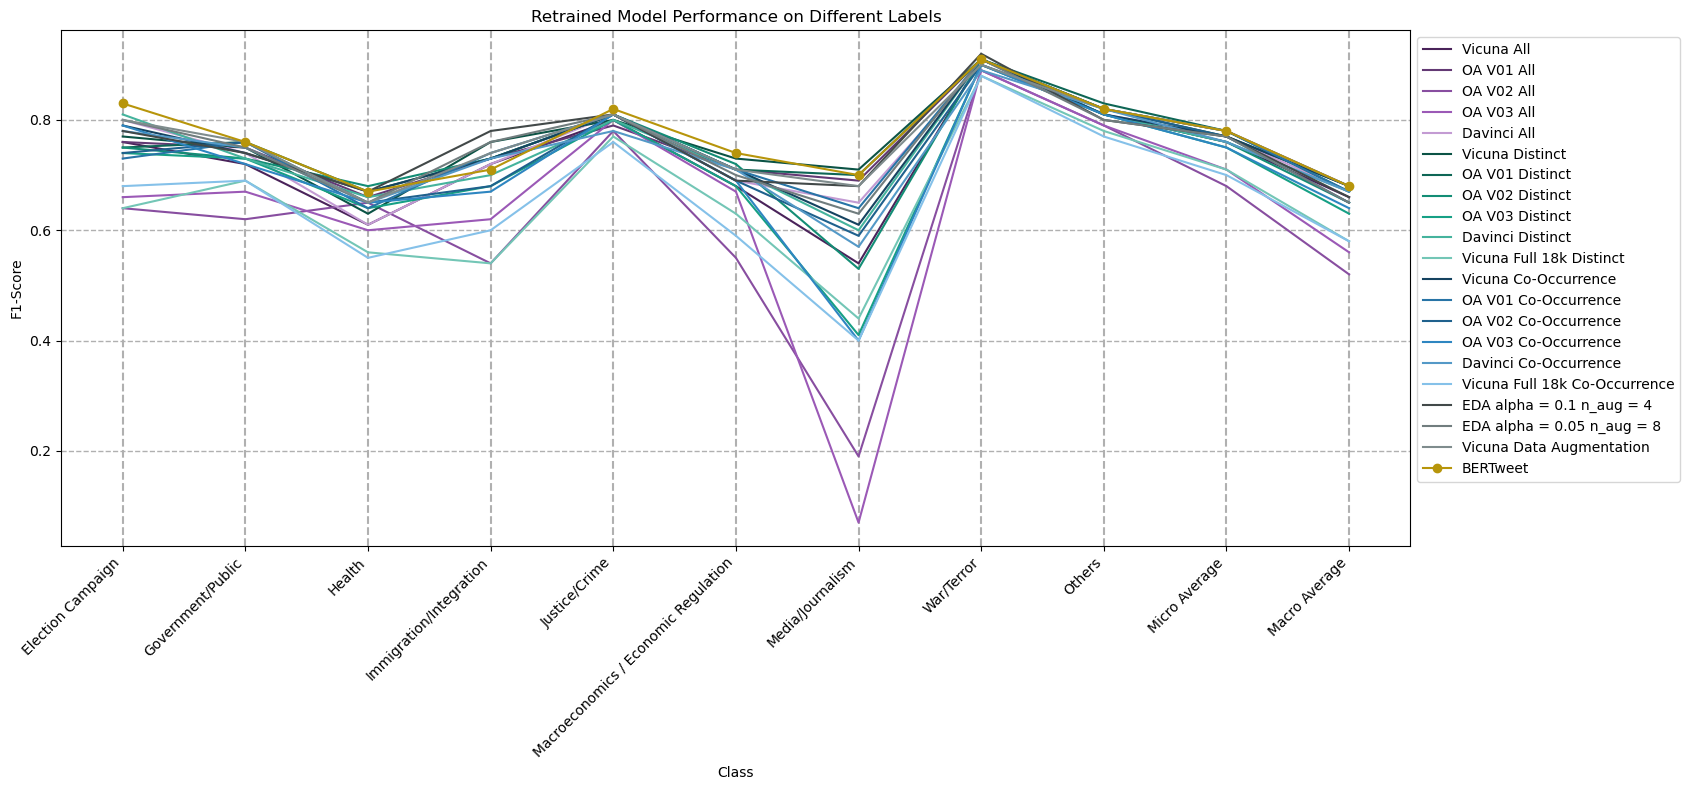

In [16]:
import matplotlib.pyplot as plt

# Data from your table
labels = ['Election Campaign', 'Government/Public', 'Health', 
         'Immigration/Integration', 'Justice/Crime', 'Macroeconomics / Economic Regulation', 
         'Media/Journalism', 'War/Terror', 'Others', 'Micro Average', 'Macro Average']

BERTweet = [0.83,  0.76, 0.67, 0.71, 0.82, 0.74, 0.70, 0.91, 0.82, 0.78, 0.68]
Vicuna_All = [.76,.72, .61, .72, .80, .68, .54, .91, .81, .76, .66]
Vicuna_Distinct = [.77,.75, .63, .76, .80,.73, .71, .91, .82, .77, .68]
OA_V01_ALL = [.76,.75, .66, .73, .79, .71, .69, .91,.82, .78, .68]
OA_V01_Distinct = [.75, .76, .67, .73, .81, .71, .70, .91, .83, .78, .67]
OA_V02_ALL = [.64,.62, .65, .54, .78, .55, .19, .89, .79, .68, .52]
OA_V02_Distinct = [.75, .73, .68, .73, .81, .72, .53, .91, .81, .76, .65]
OA_V03_ALL = [.66,.67, .60, .62, .8, .67, .07, .89, .79, .71, .56]
OA_V03_Distinct = [.74,.73, .64, .68, .80, .68, .41, .90, .81, .75, .63]
DAVINCI_ALL = [.80,.74, .61, .72, .81, .69, .65, .90, .81, .77, .67]
DAVINCI_Distinct = [.81, .73, .66, .70, .80, .71, .60, .91, .81, .76, .67]
Vicuna_Co_Occurrence = [0.79, 0.74, 0.67, 0.73, 0.81, 0.71, 0.61, 0.91, 0.81, 0.77, 0.68]
OA_V01_Co_Occurrence = [0.73, 0.76, 0.64, 0.74, 0.81, 0.71, 0.64, 0.91,0.82, 0.78, 0.67]
OA_V02_Co_Occurrence = [0.74, 0.76, 0.65, 0.68, 0.81, 0.69, 0.59, 0.90, 0.82, 0.77, 0.65]
OA_V03_Co_Occurrence = [0.79, 0.72, 0.65, 0.67, 0.81, 0.69, 0.40, 0.90, 0.81, 0.75, 0.64]
DAVINCI_Co_Occurrence = [.78,.75, .65, .73, .78, .71, .57, .89, .82, .76, .67]
EDA_Vicuna = [.80, .76, .65, .74, .81, .71, .68, .90, .82, .78, .68]
EDA_01_4 = [.78, .74, .67, .78, .81, .69, .68, .92,.80, .77, .66]
EDA_005_8 = [.8, .75, .65, .76, .81, .70, .63, .91, .8, .77, .65]
Vicuna_Distinct_Full_18k = [.64,  .69, .56, .54, .77, .63, .44, .88,.78, .71, .58]
Vicuna_Co_Occurrence_Full_18k = [.68, .69, .55, .60, .76, .59, .40, .88, .77, .70, .58]
# ... include other models' data here in the same format ...

# Plotting the data
# Color map
color_map = {
    'ALL': ['#4a235a', '#633974', '#884ea0', '#9b59b6', '#c39bd3'],  # shades of blue
    'Distinct': ['#0b5345', '#0e6655', '#138d75', '#16a085', '#45b39d', '#73c6b6'],  # shades of green
    'Co-Occurrence': ['#154360', '#2874a6', '#1f618d', '#2e86c1', '#5499c7', '#85c1e9'],  # shades of red
    'EDA': ['#424949', '#717d7e', '#7f8c8d'],  # shades of purple
    'BERTweet': '#b7950b'
}

plt.figure(figsize=(20, 8))

# Plotting the data
# When plotting, use the color_map to determine the color based on the model type
plt.plot(labels, Vicuna_All, label='Vicuna All', color=color_map['ALL'][0])
plt.plot(labels, OA_V01_ALL, label='OA V01 All', color=color_map['ALL'][1])
plt.plot(labels, OA_V02_ALL, label='OA V02 All', color=color_map['ALL'][2])
plt.plot(labels, OA_V03_ALL, label='OA V03 All', color=color_map['ALL'][3])
plt.plot(labels, DAVINCI_ALL, label='Davinci All', color=color_map['ALL'][4])

plt.plot(labels, Vicuna_Distinct, label='Vicuna Distinct', color=color_map['Distinct'][0])
plt.plot(labels, OA_V01_Distinct, label='OA V01 Distinct', color=color_map['Distinct'][1])
plt.plot(labels, OA_V02_Distinct, label='OA V02 Distinct', color=color_map['Distinct'][2])
plt.plot(labels, OA_V03_Distinct, label='OA V03 Distinct', color=color_map['Distinct'][3])
plt.plot(labels, DAVINCI_Distinct, label='Davinci Distinct', color=color_map['Distinct'][4])
plt.plot(labels, Vicuna_Distinct_Full_18k, label='Vicuna Full 18k Distinct', color=color_map['Distinct'][5])

plt.plot(labels, Vicuna_Co_Occurrence, label='Vicuna Co-Occurrence', color=color_map['Co-Occurrence'][0])
plt.plot(labels, OA_V01_Co_Occurrence, label='OA V01 Co-Occurrence', color=color_map['Co-Occurrence'][1])
plt.plot(labels, OA_V02_Co_Occurrence, label='OA V02 Co-Occurrence', color=color_map['Co-Occurrence'][2])
plt.plot(labels, OA_V03_Co_Occurrence, label='OA V03 Co-Occurrence', color=color_map['Co-Occurrence'][3])
plt.plot(labels, DAVINCI_Co_Occurrence, label='Davinci Co-Occurrence', color=color_map['Co-Occurrence'][4])
plt.plot(labels, Vicuna_Co_Occurrence_Full_18k, label='Vicuna Full 18k Co-Occurrence', color=color_map['Co-Occurrence'][5])

plt.plot(labels, EDA_01_4, label='EDA alpha = 0.1 n_aug = 4', color=color_map['EDA'][0])
plt.plot(labels, EDA_005_8, label='EDA alpha = 0.05 n_aug = 8', color=color_map['EDA'][1])
plt.plot(labels, EDA_Vicuna, label='Vicuna Data Augmentation', color=color_map['EDA'][2])

plt.plot(labels, BERTweet, marker='o', label='BERTweet', color=color_map['BERTweet'])


# Setting labels, title, legend, etc.
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.title('Retrained Model Performance on Different Labels')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.grid(True, axis='both', linestyle='--', linewidth=1)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.85, 1])


ax = plt.gca()

# Making the vertical grid lines thicker
ax.xaxis.grid(True, linestyle='--', linewidth=1.5)

# Making specific labels bold
bold_labels = ['Conspiracy Theory', 'Education', 'Environment', 'Labor/Employment', 'Science/Technology', 'Religion']
for label in ax.get_xticklabels():
    if label.get_text() in bold_labels:
        label.set_weight('bold')

plt.show()


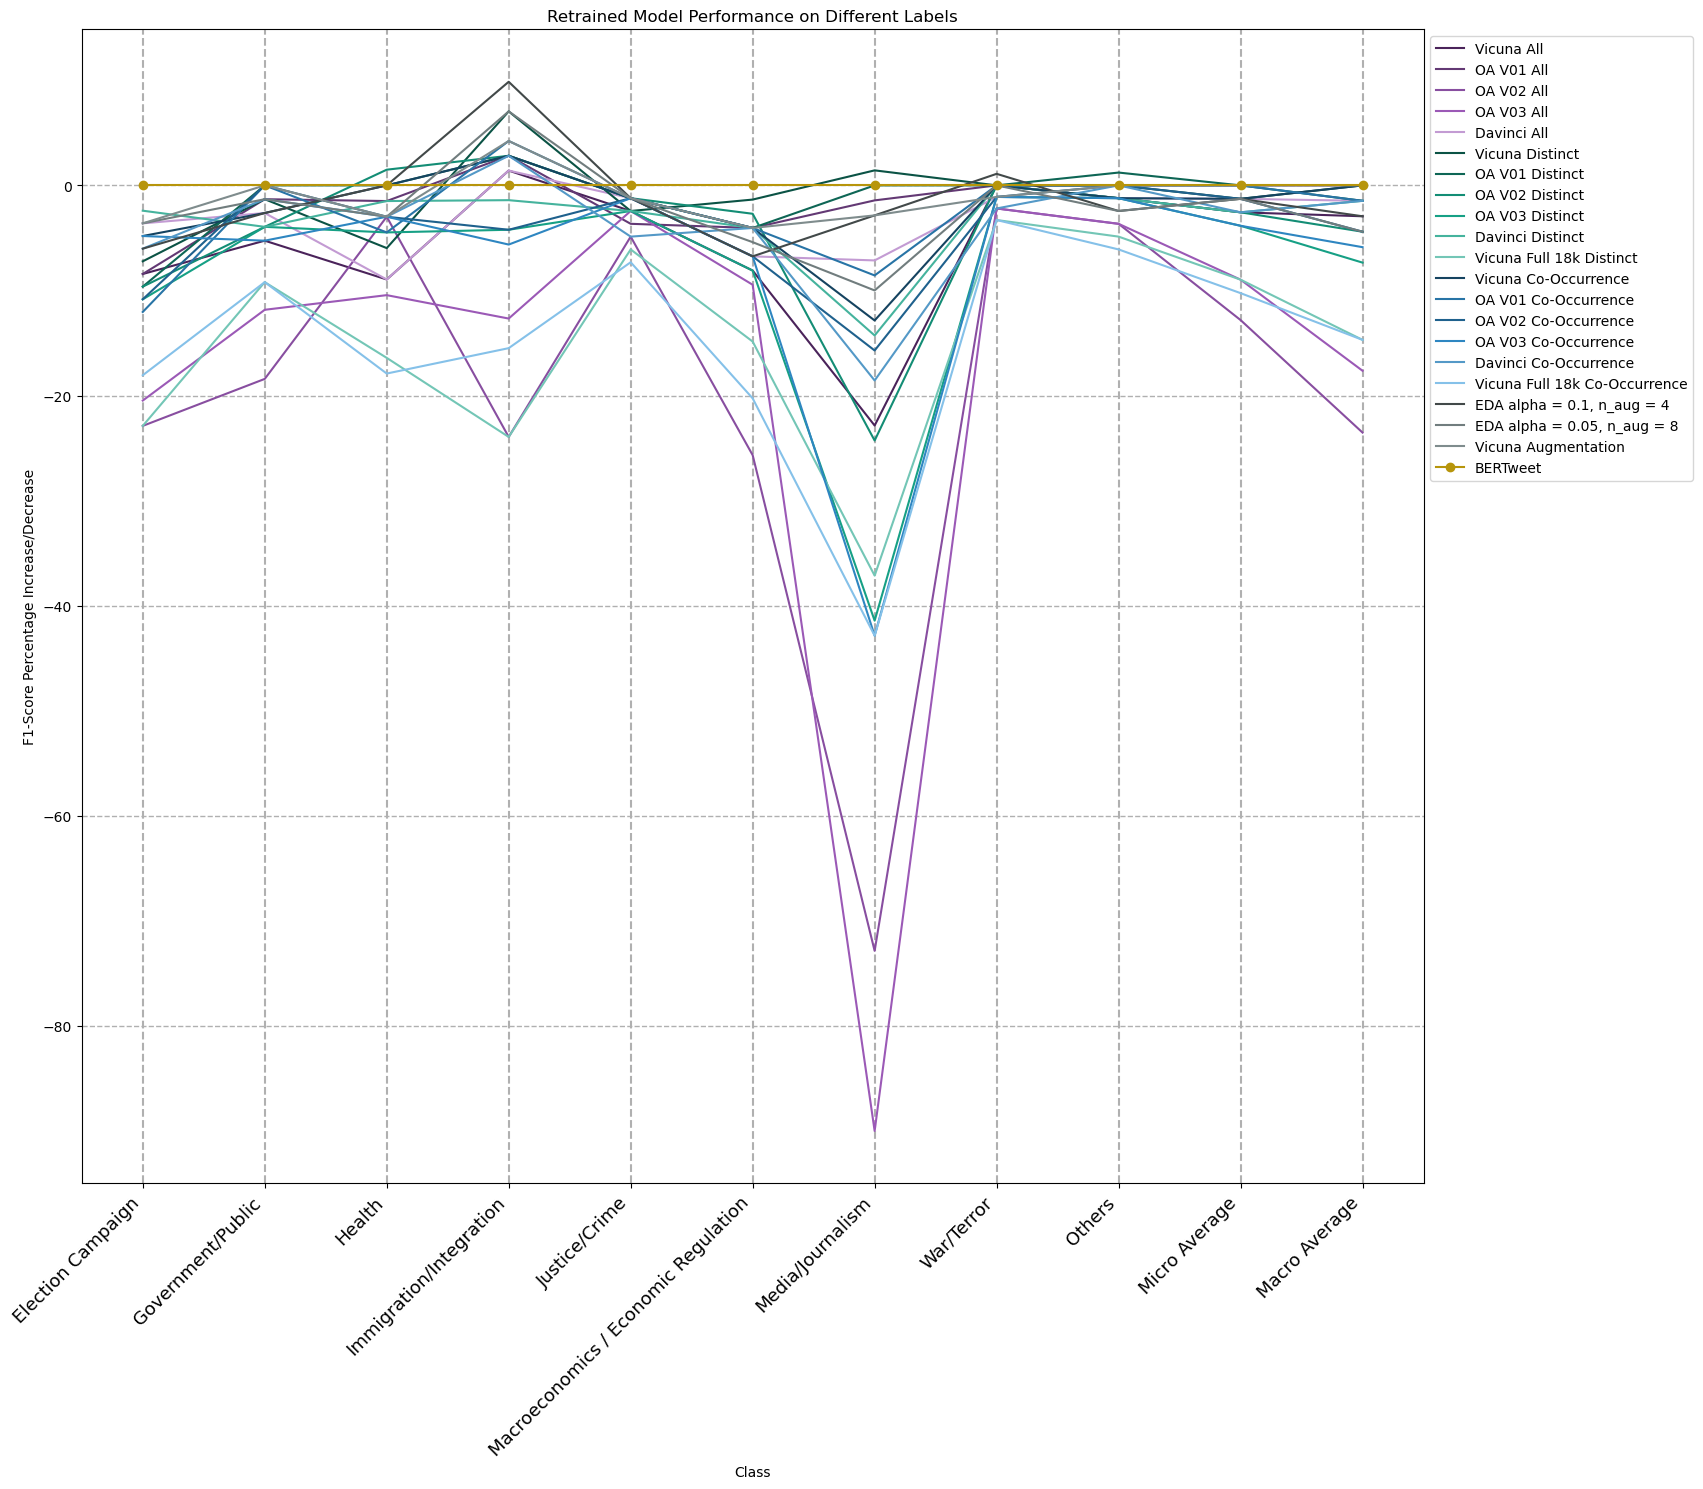

In [18]:
import matplotlib.pyplot as plt
import numpy as np
 
# ... [rest of your data] ...
 
def percent_difference_from_bertweet(data, bertweet):
    return [(val - bert) / bert * 100 for val, bert in zip(data, bertweet)]
 
# Create percentage differences for all models compared to BERTweet
Vicuna_All_diff = percent_difference_from_bertweet(Vicuna_All, BERTweet)
 
def categorize_percent_diff(percent_diff):
    return [min(100, max(-100, val)) for val in percent_diff] 
 
plt.figure(figsize=(20, 15))
 
all_models = {
    'ALL': [Vicuna_All, OA_V01_ALL, OA_V02_ALL, OA_V03_ALL, DAVINCI_ALL],
    'Distinct': [Vicuna_Distinct, OA_V01_Distinct, OA_V02_Distinct, OA_V03_Distinct, DAVINCI_Distinct, Vicuna_Distinct_Full_18k],
    'Co-Occurrence': [Vicuna_Co_Occurrence, OA_V01_Co_Occurrence, OA_V02_Co_Occurrence, OA_V03_Co_Occurrence, DAVINCI_Co_Occurrence, Vicuna_Co_Occurrence_Full_18k],
    'EDA': [EDA_01_4, EDA_005_8, EDA_Vicuna]
}
 
all_models_name = {
    'ALL': ["Vicuna All", "OA V01 All", "OA V02 All", "OA V03 All", "Davinci All"],
    'Distinct': ["Vicuna Distinct", "OA V01 Distinct", "OA V02 Distinct", "OA V03 Distinct", "Davinci Distinct", "Vicuna Full 18k Distinct"],
    'Co-Occurrence': ["Vicuna Co-Occurrence", "OA V01 Co-Occurrence", "OA V02 Co-Occurrence", "OA V03 Co-Occurrence", "Davinci Co-Occurrence",  "Vicuna Full 18k Co-Occurrence"],
    'EDA': ["EDA alpha = 0.1, n_aug = 4", "EDA alpha = 0.05, n_aug = 8", "Vicuna Augmentation"],
}
 
# Plotting the data:
 
# Loop over categories and their respective models
for category, models in all_models.items():
    for i, model in enumerate(models):
        model_diff = percent_difference_from_bertweet(model, BERTweet)
        model_cat = categorize_percent_diff(model_diff)
        plt.plot(labels, model_cat, label=f'{all_models_name[category][i]}', color=color_map[category][i])
 
plt.plot(labels, [0]*11, marker='o', label='BERTweet', color=color_map['BERTweet'])
 
# Setting labels, title, legend, etc.
plt.xlabel('Class')
plt.ylabel('F1-Score Percentage Increase/Decrease')
plt.title('Retrained Model Performance on Different Labels')
plt.legend()
plt.xticks(rotation=45, ha='right', fontsize=13)
plt.tight_layout()
#plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.grid(True, axis='both', linestyle='--', linewidth=1)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.85, 1])
 
 
ax = plt.gca()
 
# Making the vertical grid lines thicker
ax.xaxis.grid(True, linestyle='--', linewidth=1.5)
 
# Making specific labels bold
bold_labels = ['Conspiracy Theory', 'Education', 'Environment', 'Labor/Employment', 'Science/Technology', 'Religion']
for label in ax.get_xticklabels():
    if label.get_text() in bold_labels:
        label.set_weight('bold')
 
plt.show()